# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
#___________________________________
#|                                 |
#|  Created by: Huy Benjamin Pham  |
#|_________________________________|

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
data = pd.read_csv('stock_data.csv')

In [ ]:
#top 5 rows
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
#last 5 rows
data.tail()


,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
#viewing data shape
print(f'The dataset have {data.shape[0]} rows, and {data.shape[1]} columns')

The dataset have 340 rows, and 15 columns


In [ ]:
#statistical summary
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [ ]:
#view data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Copy data for manipulation

In [ ]:
df= data.copy()
print('Copy dataset completed')

Copy dataset completed


### Checking for missing values and duplicates


In [ ]:
#checking for missing values
df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis:


In [ ]:
# boxplot and histogram on the same scale function:
def boxplot_hist(data, feature, figsize=(12, 7), kde= False, bins=None):
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,  # Number of rows of the subplot grid= 2
      sharex=True,  # x-axis will be shared among all subplots
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize,
  )
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
  )  # showing the mean value
  sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax_hist2,
      bins=bins
      if bins
      else "auto",
  )
  ax_hist2.axvline(
      data[feature].mean(), color="cyan", linestyle="--"
  )  # Add a vertical line to the mean
  ax_hist2.axvline(
      data[feature].median(), color="yellow", linestyle="-"
  )  # Add a vertical line to the median
  ax_box2.set(yticks=[])
  sns.despine(ax=ax_hist2, left=True)
  plt.tight_layout()
  plt.show()
  return



``` Current Price ```



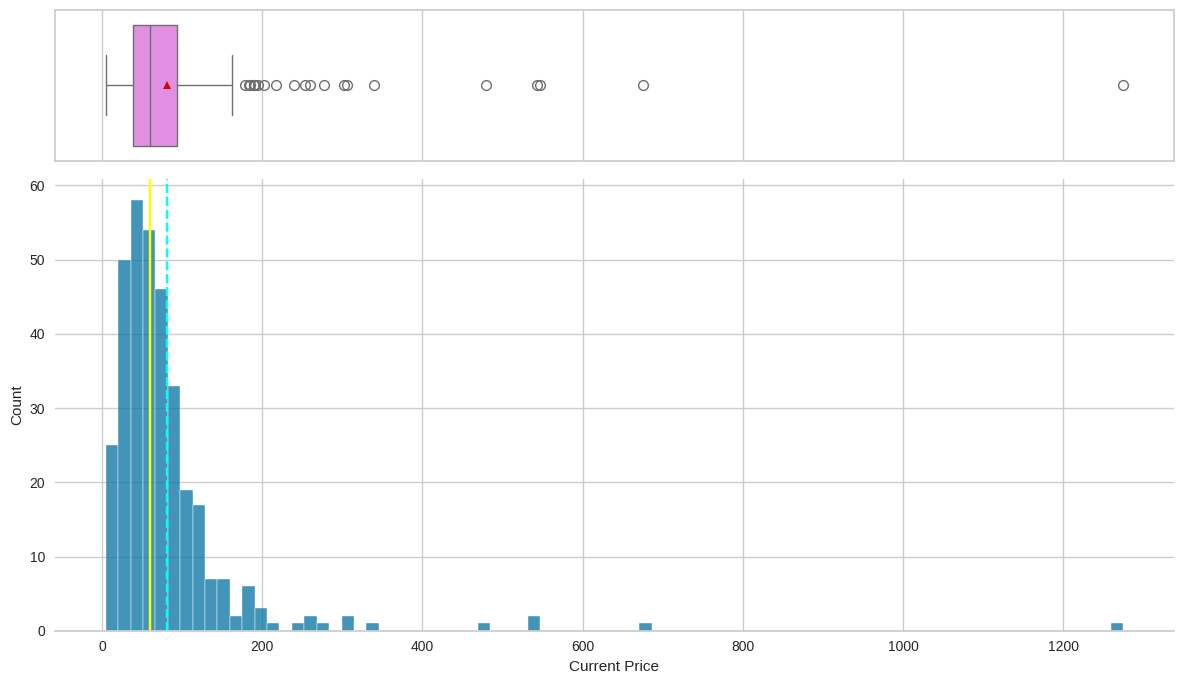

In [ ]:
boxplot_hist(df, 'Current Price')

**Feedback:**

The distribution of current price is right skewed, with a number of outliers on the higher end.

This suggests that there are a few stocks with very high prices, which are driving up the mean.

The median price is much lower than the mean, which indicates that most stocks are priced relatively low.

This skewed distribution could affect stock prices in a number of ways.
- For example, it could make it difficult to accurately predict future prices, as the outliers could have a disproportionate impact on the model.

- It could also make it difficult to compare stocks across different sectors, as the price ranges may be very different.

``` Price Change ```

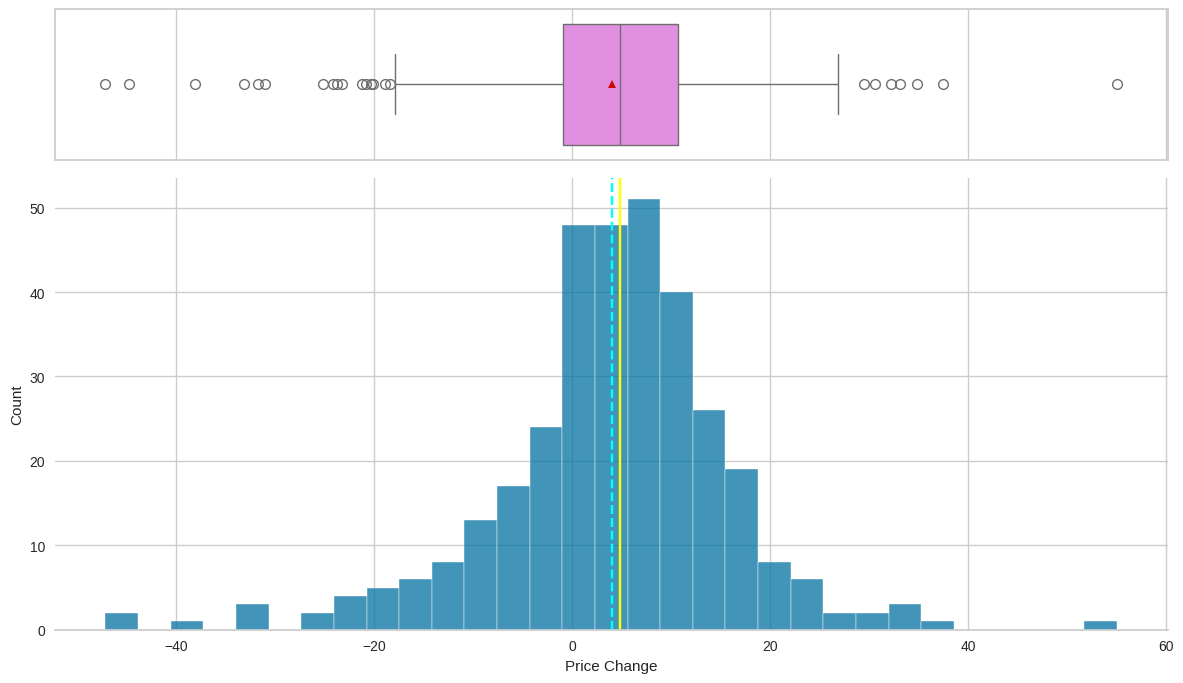

In [ ]:
boxplot_hist(df, 'Price Change')

**Feedback:**

The distribution of price change is approximately normal, with a slight right skew.

The mean and median are close to zero, which suggests that there is no overall trend in stock prices over the past 13 weeks.

However, there are a few outliers on both the positive and negative sides, which indicates that some stocks have experienced significant price changes.

This distribution could affect stock prices in a number of ways.

For example, the right skew suggests that there is a greater potential for large price increases than large price decreases.

- This could make stocks more attractive to investors who are looking for high returns.

- However, the outliers on the negative side suggest that there is also a risk of large losses.

- Investors should carefully consider their risk tolerance before investing in stocks.


``` Volatility```

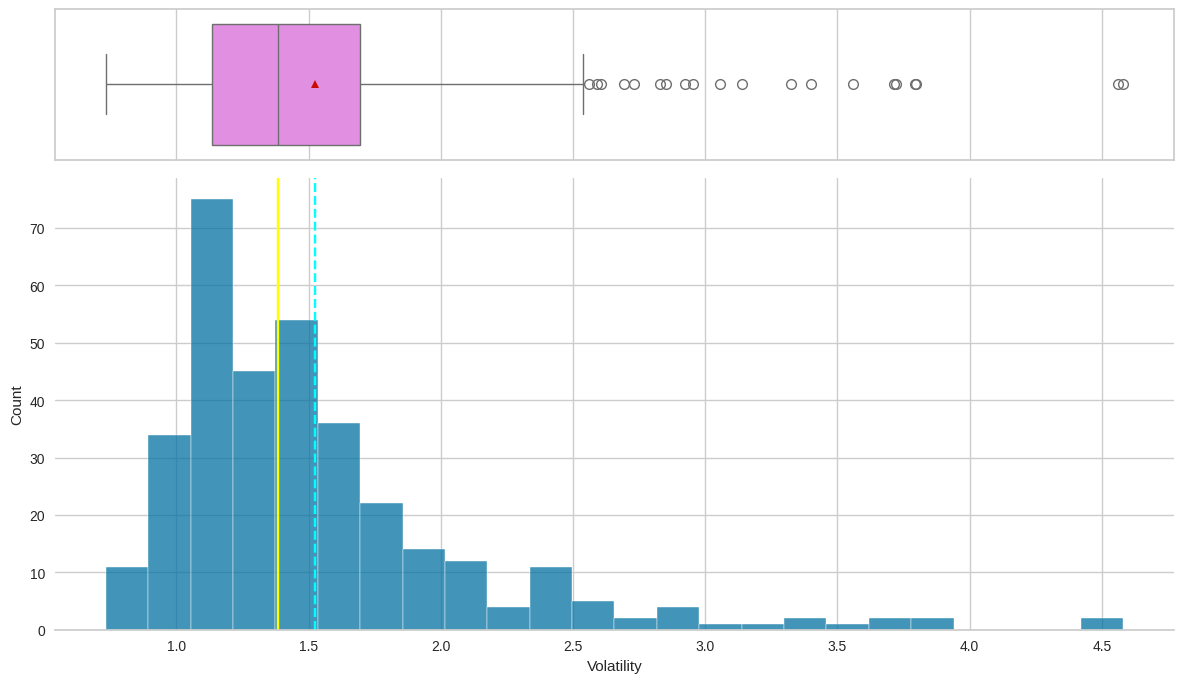

In [ ]:
boxplot_hist(df, 'Volatility')

 **Feedback:**

The distribution of volatility is right-skewed, with a number of outliers on the higher end.

- This suggests that there are a few stocks that are very volatile, while most stocks are relatively stable.

- The median volatility is lower than the mean, which indicates that most stocks have a relatively low level of risk.

This skewed distribution of volatility could affect stock prices in a number of ways.

For example, it could make it difficult to accurately predict future prices, as the outliers could have a disproportionate impact on the model.

- It could also make it difficult to compare stocks across different sectors, as the volatility ranges may be very different.

- Investors should carefully consider the volatility of a stock before investing, as it can have a significant impact on their returns.


``` ROE ```

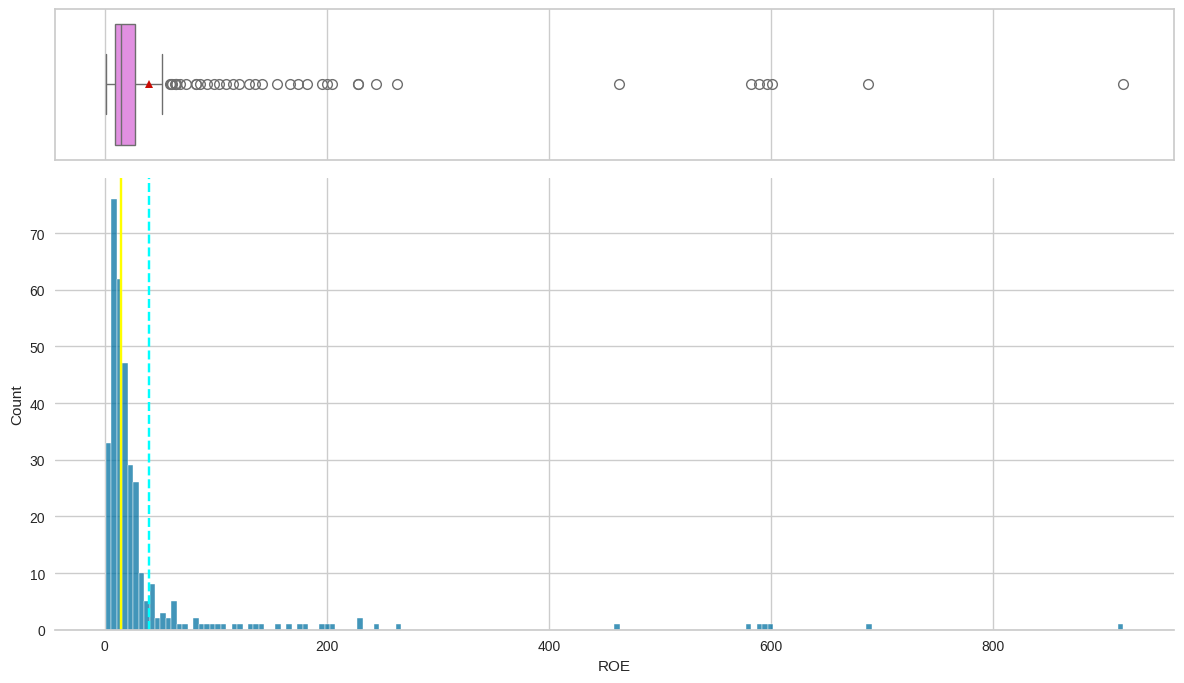

In [ ]:
boxplot_hist(df, 'ROE')

 **Feedback:**

The distribution of ROE is approximately normal, with a slight right skew.

- The mean and median are close to each other, which suggests that most companies have a similar level of profitability.

- However, there are a few outliers on both the positive and negative sides, which indicates that some companies are much more or less profitable than the average.

This distribution of ROE could affect stock prices in a number of ways.

For example, companies with high ROEs are typically more attractive to investors, as they are seen as being more likely to generate strong profits in the future.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low or negative ROEs may be seen as being less attractive to investors, which could lead to lower stock prices.


``` Cash Ratio ```


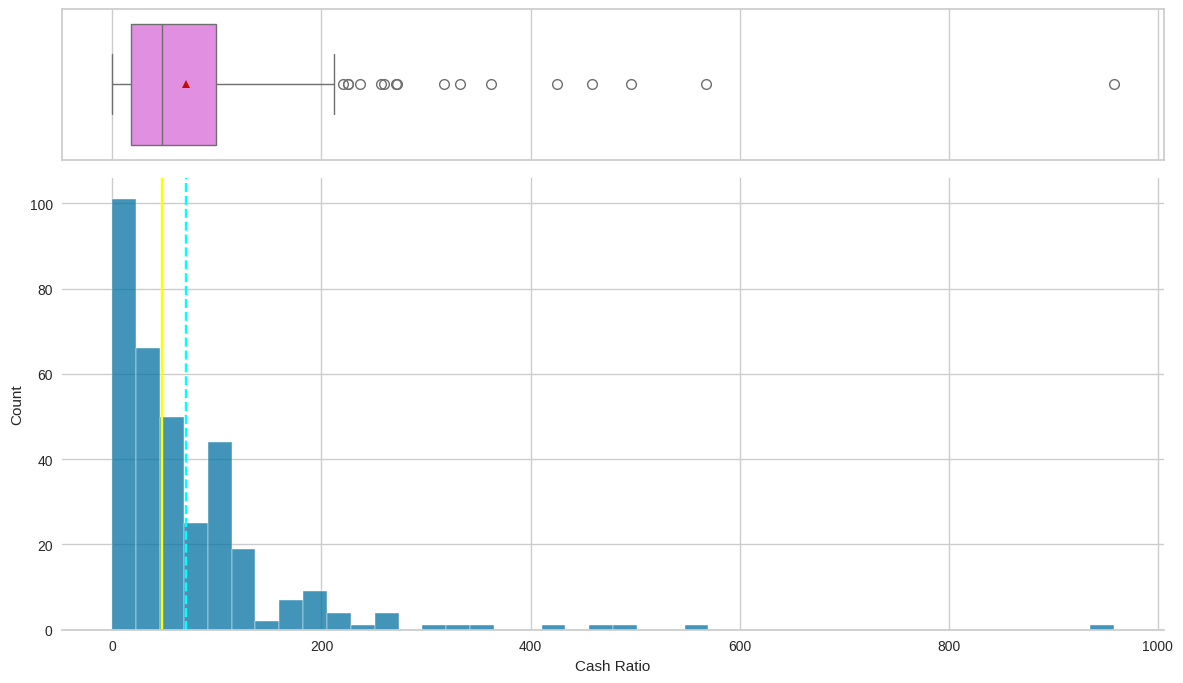

In [ ]:
boxplot_hist(df, 'Cash Ratio')

**Feedback:**

The distribution of the cash ratio is right-skewed, with a number of outliers on the higher end.

- This suggests that there are a few companies that have a very high cash ratio, while most companies have a relatively low cash ratio.

- The median cash ratio is lower than the mean, which indicates that most companies have a relatively low level of cash on hand.

This skewed distribution of the cash ratio could affect stock prices in a number of ways.

For example, companies with high cash ratios are typically seen as being more financially stable, as they have more resources to weather economic downturns.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low cash ratios may be seen as being more risky, which could lead to lower stock prices.

- Investors should carefully consider the cash ratio of a company before investing, as it can be an indicator of the company's financial health.


``` Net Cash Flow ```


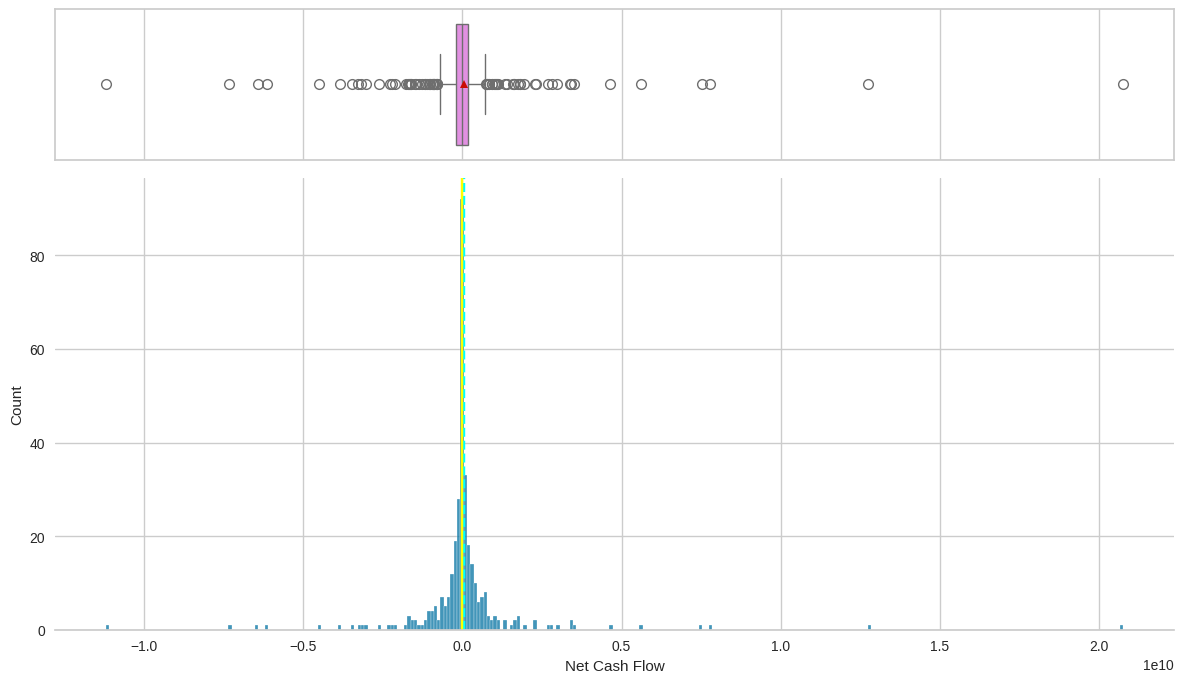

In [ ]:
boxplot_hist(df, 'Net Cash Flow')

 **Feedback:**

The distribution of net cash flow is approximately normal, with a slight right skew.

- The mean and median are close to each other, which suggests that most companies have a similar level of net cash flow.

- However, there are a few outliers on both the positive and negative sides, which indicates that some companies have much higher or lower net cash flow than the average.

This distribution of net cash flow could affect stock prices in a number of ways.

For example, companies with high net cash flow are typically seen as being more financially healthy, as they are generating more cash than they are spending.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low or negative net cash flow may be seen as being less attractive to investors, which could lead to lower stock prices.

- Investors should carefully consider the net cash flow of a company before investing, as it can be an indicator of the company's financial health.


``` Net Income ```

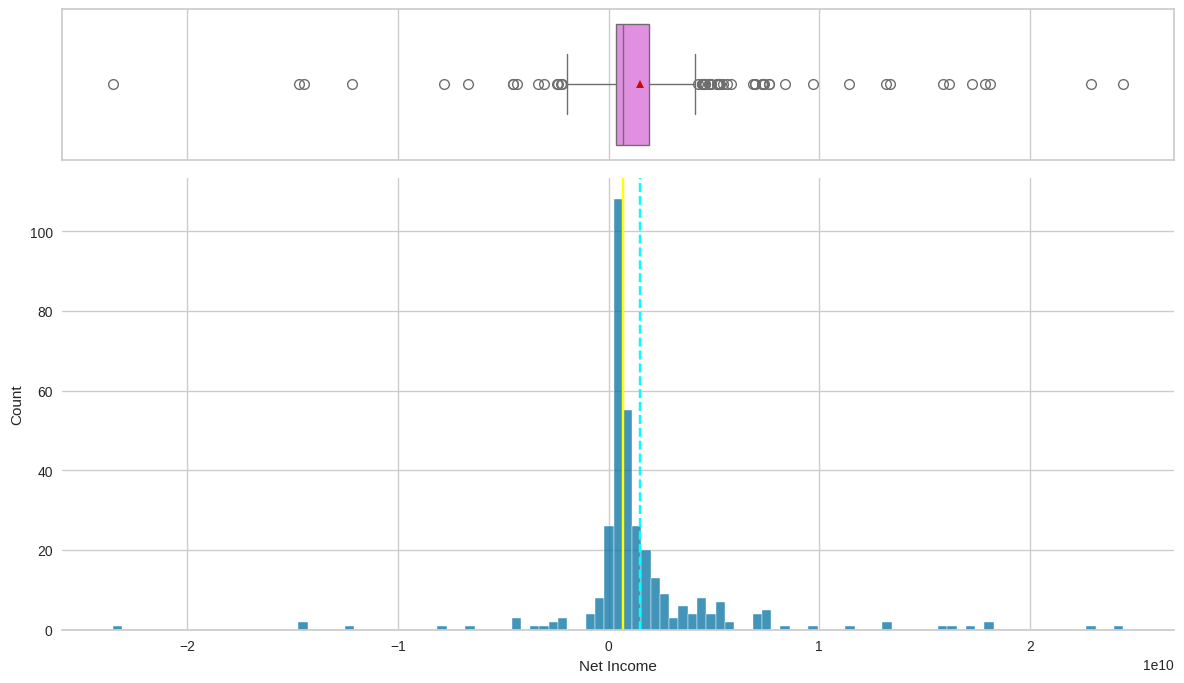

In [ ]:
boxplot_hist(df, 'Net Income')

 **Feedback:**

The distribution of net income is right-skewed, with a number of outliers on the higher end.

 - This suggests that there are a few companies that are very profitable, while most companies have relatively modest net incomes.

 - The median net income is lower than the mean, which indicates that most companies have a relatively low level of profitability.

 This skewed distribution of net income could affect stock prices in a number of ways.

For example, companies with high net incomes are typically seen as being more valuable, as they are generating more profits for their shareholders.

 - This could lead to higher stock prices for these companies.

 - Conversely, companies with low or negative net incomes may be seen as being less attractive to investors, which could lead to lower stock prices.

 - Investors should carefully consider the net income of a company before investing, as it can be an indicator of the company's financial health and future prospects.


```Earing Per Share```

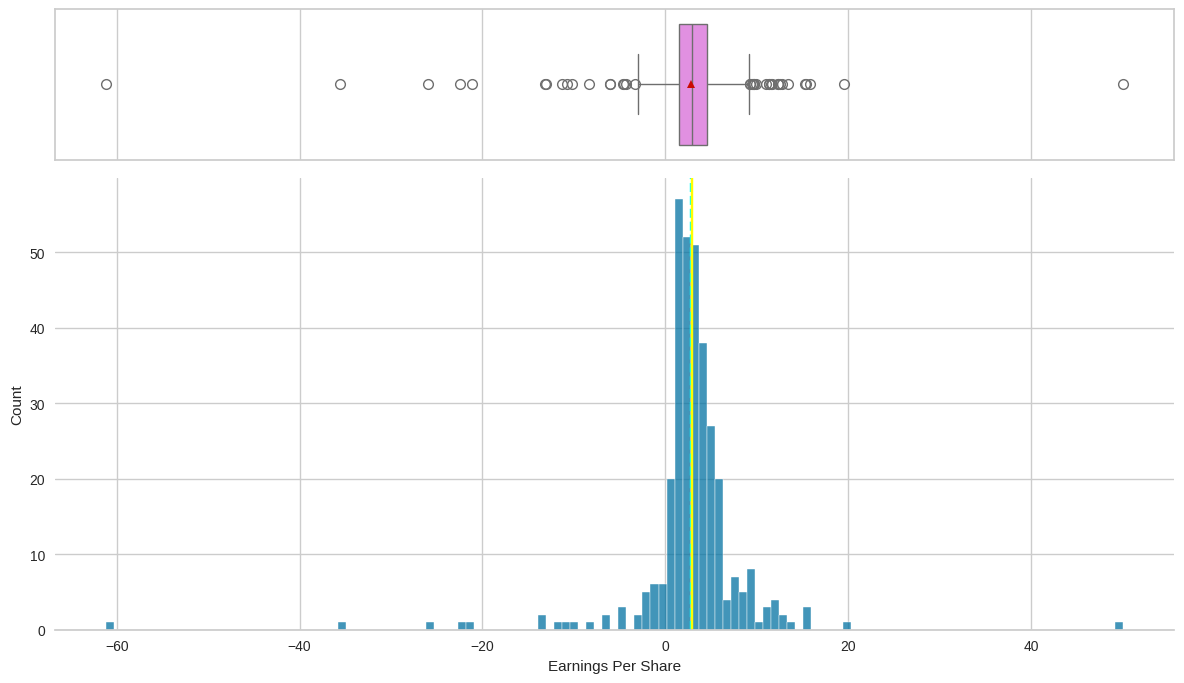

In [ ]:
boxplot_hist(df, 'Earnings Per Share')

**Feedback:**

The distribution of earnings per share (EPS) is right-skewed, with a number of outliers on the higher end.

- This suggests that there are a few companies with very high EPS, while most companies have relatively modest EPS.

- The median EPS is lower than the mean, which indicates that most companies have a relatively low level of earnings per share.

This skewed distribution of EPS could affect stock prices in a number of ways.

For example, companies with high EPS are typically seen as being more profitable and valuable, as they are generating more earnings for each share of stock outstanding.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low or negative EPS may be seen as being less attractive to investors, which could lead to lower stock prices.

- Investors should carefully consider the EPS of a company before investing, as it can be an indicator of the company's financial health and future prospects.


``` Estimated Shares Outstanding ```

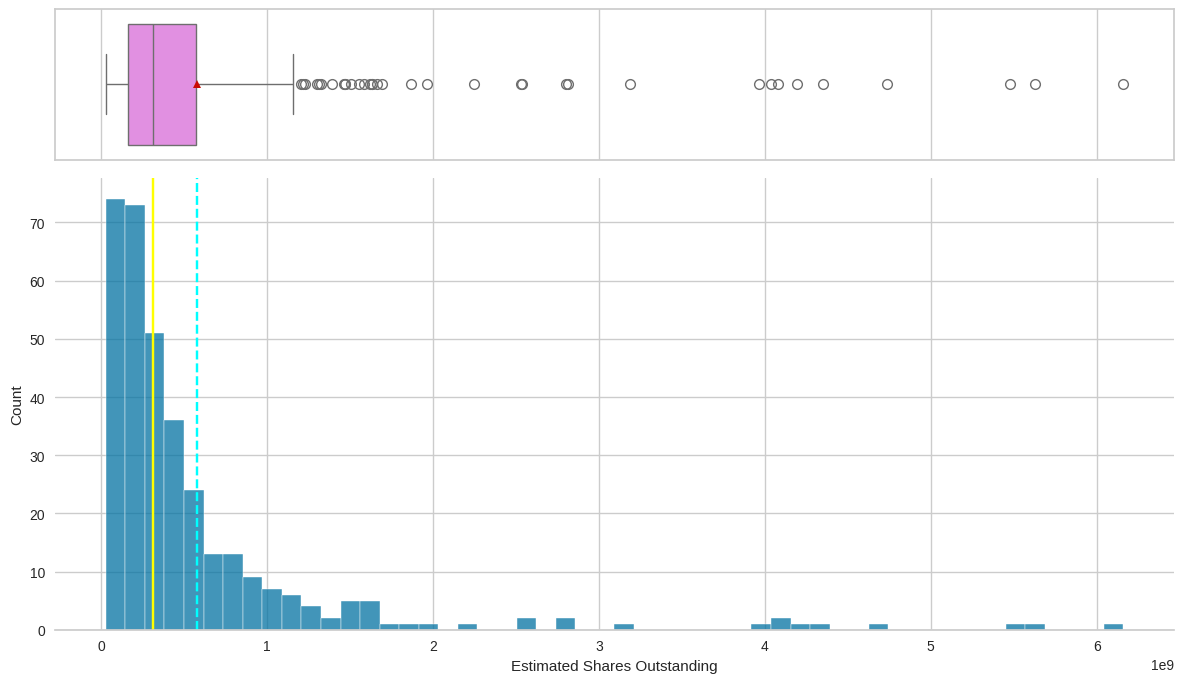

In [ ]:
boxplot_hist(df, 'Estimated Shares Outstanding')

**Feedback:**

The chart above represents the distribution of estimated shares outstanding.

It is heavily right skewed, with many outliers at the high end.

This means that there are a few companies with a very large number of shares outstanding.

This can affect stock prices in a few ways:

* **Lower prices:** Companies with a large number of shares outstanding tend to have lower stock prices. This is because the total value of the company is divided among a larger number of shares.
* **Higher volatility:** Stocks with a large number of shares outstanding can be more volatile. This is because a small change in the price of a single share can have a large impact on the overall value of the company.
* **Lower liquidity:** Stocks with a large number of shares outstanding can be less liquid. This means that it can be more difficult to buy or sell shares without affecting the price.


``` P/E Ratio ```


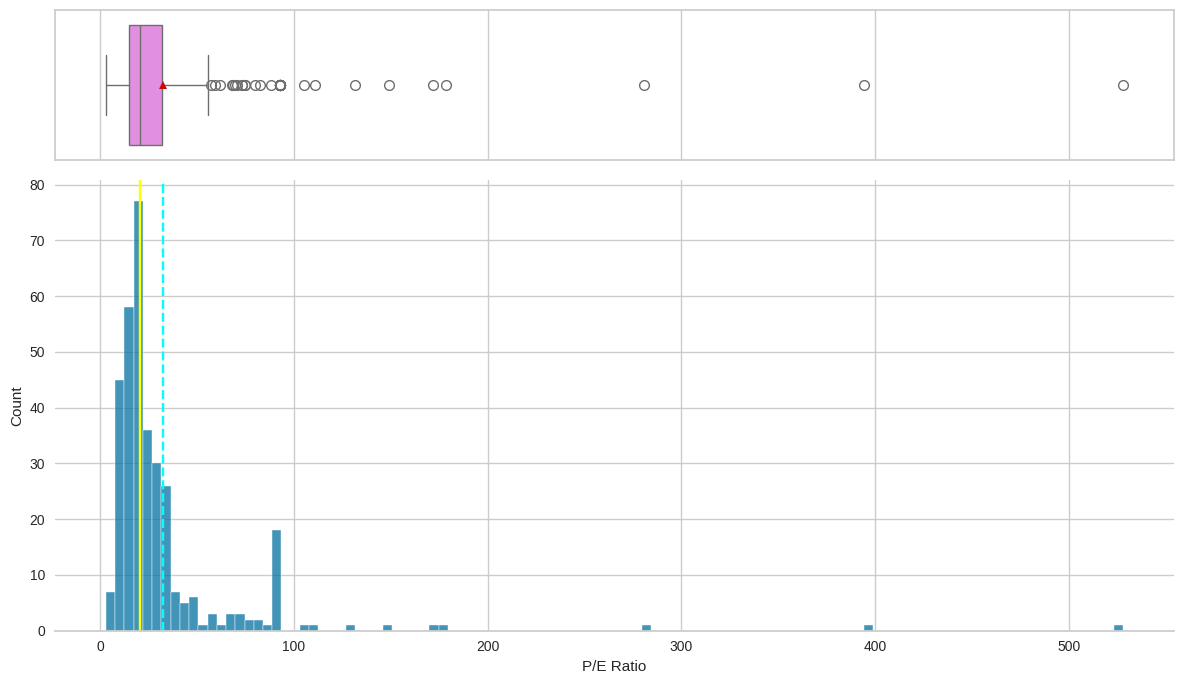

In [ ]:
boxplot_hist(df, 'P/E Ratio')

**Feedback:**

The distribution of the P/E ratio is right-skewed, with a number of outliers on the higher end.

 - This suggests that there are a few companies that have a very high P/E ratio, while most companies have a relatively low P/E ratio.

 - The median P/E ratio is lower than the mean, which indicates that most companies have a relatively low P/E ratio.

This skewed distribution of the P/E ratio could affect stock prices in a number of ways.

For example, companies with high P/E ratios are typically seen as being more expensive, as investors are willing to pay more for each dollar of earnings.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low P/E ratios may be seen as being more undervalued, which could lead to lower stock prices.

- Investors should carefully consider the P/E ratio of a company before investing, as it can be an indicator of the company's valuation and future growth prospects.


``` P/B Ratio ```

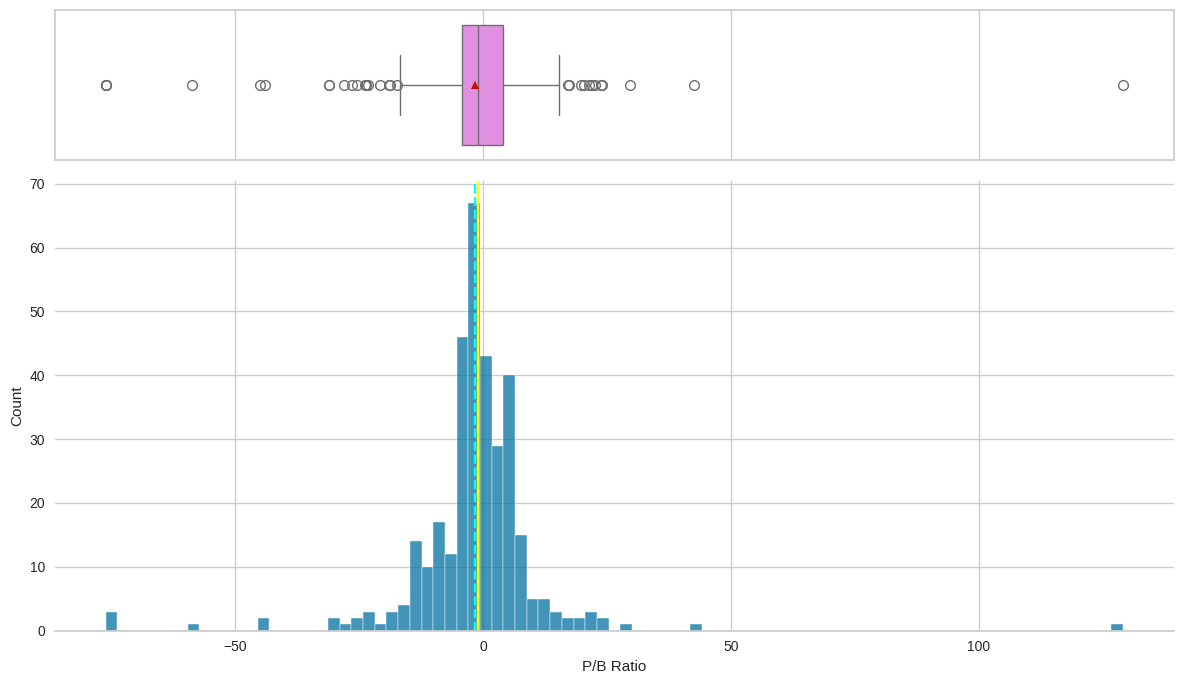

In [ ]:
boxplot_hist(df, 'P/B Ratio')

**Feedback:**

The distribution of the P/B ratio is right-skewed, with a number of outliers on the higher end.

- This suggests that there are a few companies with a very high P/B ratio, while most companies have a relatively low P/B ratio.

- The median P/B ratio is lower than the mean, which indicates that most companies have a relatively low P/B ratio.

This skewed distribution of the P/B ratio could affect stock prices in a number of ways.

For example, companies with high P/B ratios are typically seen as being more expensive, as investors are willing to pay more for each dollar of book value.

- This could lead to higher stock prices for these companies.

- Conversely, companies with low P/B ratios may be seen as being more undervalued, which could lead to lower stock prices.

- Investors should carefully consider the P/B ratio of a company before investing, as it can be an indicator of the company's valuation and future growth prospects.

In [ ]:
# label barplot
def perc_barplot(data, feature, perc_top= None, n=None, palette = 'rocket'):
  total = len(data)
  count = data[feature].nunique()
  if n is None:
      plt.figure(figsize=(count + 1, 5))
  else:
      plt.figure(figsize=(n + 1, 5))

  plt.xticks(rotation=90)
  ax = sns.countplot(
      data=data,
      x=feature,
      order=data[feature].value_counts().index[:n].sort_values(),)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height() / total)
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center')

  plt.show()
  return

``` GICS Sector ```

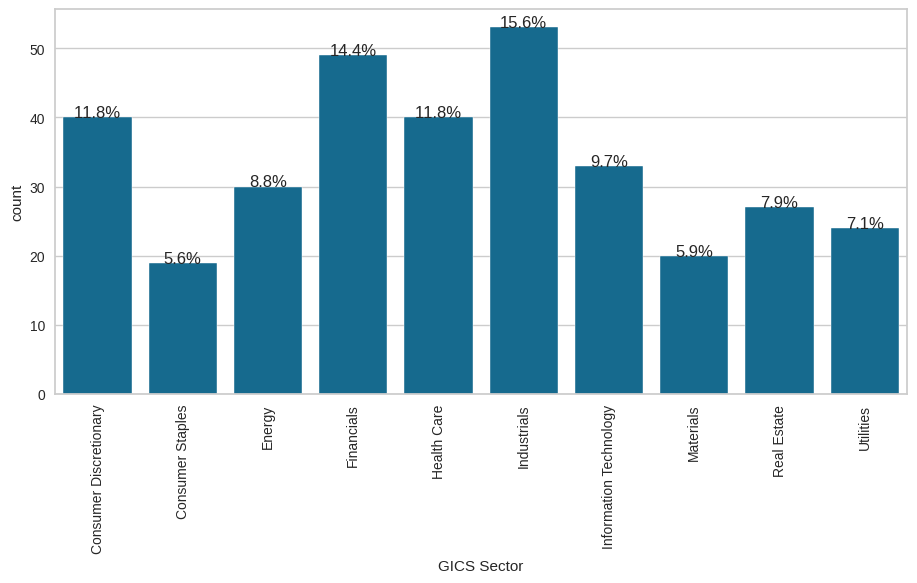

In [ ]:
perc_barplot(df, 'GICS Sector', n=10, perc_top=True)

**Feedback:**

The chart above shows the distribution of companies across different GICS sectors in the dataset.

- The Information Technology sector has the highest representation, followed by Industrials and Financials.

- This suggests that the dataset is biased towards these sectors, which could affect the results of any analysis or modeling performed on the data.

This distribution of companies across sectors could affect stock prices in a number of ways.

- For example, sectors that are over-represented in the dataset may be more likely to be identified as having high potential for growth, which could lead to higher stock prices for companies in those sectors.

- Conversely, sectors that are under-represented in the dataset may be more likely to be overlooked, which could lead to lower stock prices for companies in those sectors.

- Investors should be aware of this potential bias when interpreting the results of any analysis or modeling performed on the data.


``` GICS Sub Industry```

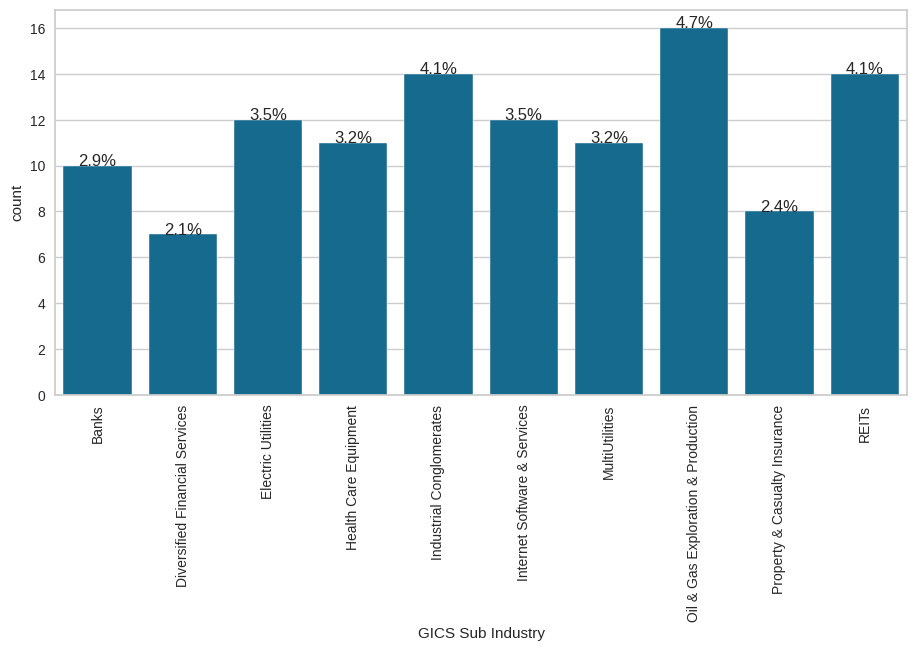

In [ ]:
perc_barplot(df, 'GICS Sub Industry', n=10, perc_top=True)

**Feedback:**

The chart above shows the distribution of companies across different GICS sub-industries in the dataset.

- The most represented sub-industry is Semiconductors, followed by Banks and IT Consulting & Other Services.

- This suggests that the dataset is biased towards these sub-industries, which could affect the results of any analysis or modeling performed on the data.

This distribution of companies across sub-industries could affect stock prices in a number of ways.

- For example, sub-industries that are over-represented in the dataset may be more likely to be identified as having high potential for growth, which could lead to higher stock prices for companies in those sub-industries.

- Conversely, sub-industries that are under-represented in the dataset may be more likely to be overlooked, which could lead to lower stock prices for companies in those sub-industries.

- Investors should be aware of this potential bias when interpreting the results of any analysis or modeling performed on the data.


### Bi-Variate Analysis:


``` Data Correlations ```


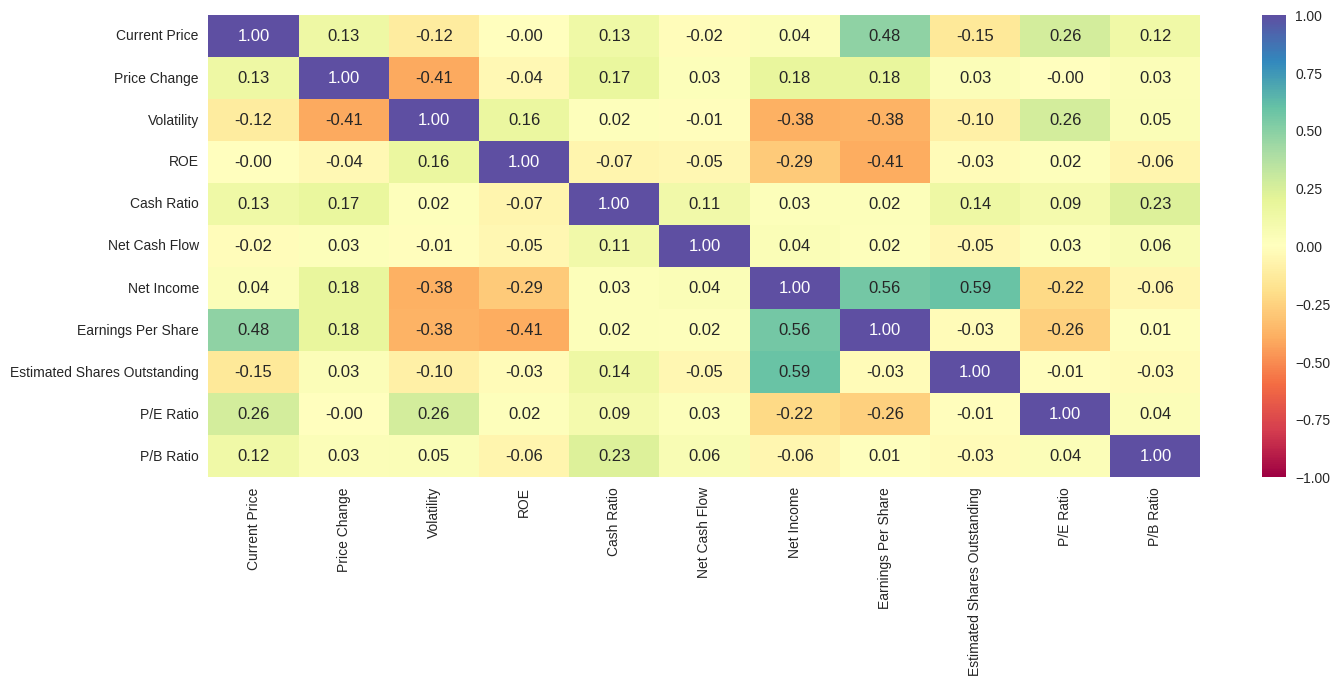

In [ ]:
#correlation
plt.figure(figsize=(16, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Feedback:**

 The heatmap shows the correlation between different numerical variables in the dataset.

 Some of the key correlations that can be observed are:

 * **Positive correlation between Current Price and Estimated Shares Outstanding:** This suggests that companies with a larger number of shares outstanding tend to have higher stock prices.
 * **Positive correlation between Current Price and Net Income:** This suggests that companies with higher net incomes tend to have higher stock prices.
 * **Positive correlation between ROE and P/E Ratio:** This suggests that companies with higher ROEs tend to have higher P/E ratios.
 * **Negative correlation between Volatility and P/E Ratio:** This suggests that companies with higher volatility tend to have lower P/E ratios.
 * **Positive correlation between Cash Ratio and Net Cash Flow:** This suggests that companies with higher cash ratios tend to have higher net cash flows.

These correlations can affect stock prices in a number of ways.

For example, the positive correlation between Current Price and Net Income suggests that investors are willing to pay more for companies that are more profitable.

The negative correlation between Volatility and P/E Ratio suggests that investors are willing to pay less for companies that are more risky.

Understanding these correlations can help investors make more informed decisions about which stocks to buy or sell.


``` Peak price per economic sector ```

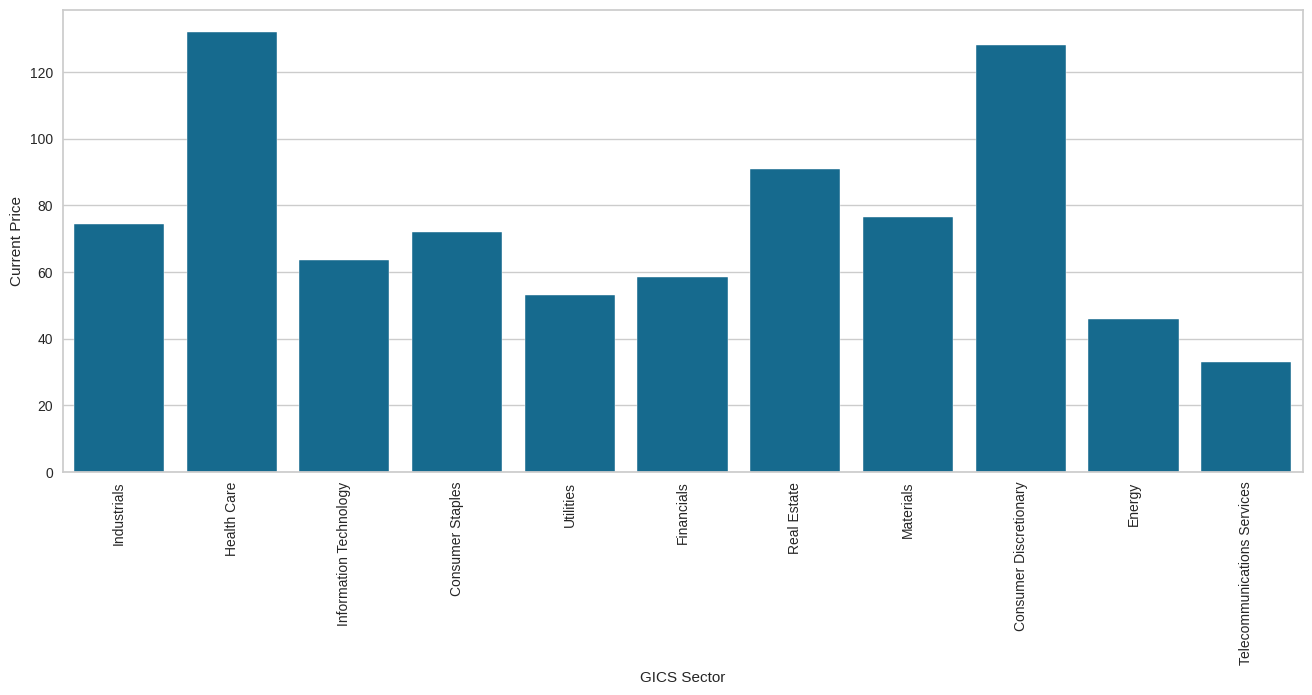

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='GICS Sector', y='Current Price', data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

**Feedback:**

The bar chart displays the average current price of stocks within each GICS sector.

- It appears that the Communication Services sector exhibits the highest average stock price, followed by the Consumer Discretionary and Information Technology sectors.

- Conversely, the Utilities and Real Estate sectors demonstrate the lowest average stock prices.

**How Stock Prices Will Be Affected:**

This distribution of average stock prices across sectors can influence stock prices in various ways:

- **Sector Performance:** Sectors with higher average stock prices, such as Communication Services, may be perceived as having stronger growth potential or greater investor confidence. This perception could lead to continued upward pressure on stock prices within those sectors.

- **Investor Sentiment:** Investors might gravitate towards sectors with historically high average stock prices, anticipating further gains. This increased demand could drive up stock prices in those sectors.

- **Relative Valuation:** Stocks within sectors with lower average prices, like Utilities, might be considered undervalued compared to those in higher-priced sectors. This could attract value investors seeking potential bargains, potentially boosting stock prices in those sectors.

- **Economic Factors:** Sector-specific economic conditions can significantly impact stock prices. For instance, rising interest rates might negatively affect the Real Estate sector, while technological advancements could benefit the Information Technology sector.

**Important Considerations:**

- This analysis solely considers average stock prices within sectors. It's crucial to evaluate individual company performance, financial health, and industry trends to make informed investment decisions.

- Market fluctuations and external factors can also influence stock prices, regardless of sector affiliation.


``` Avg Cash ratio accross economic sector ```

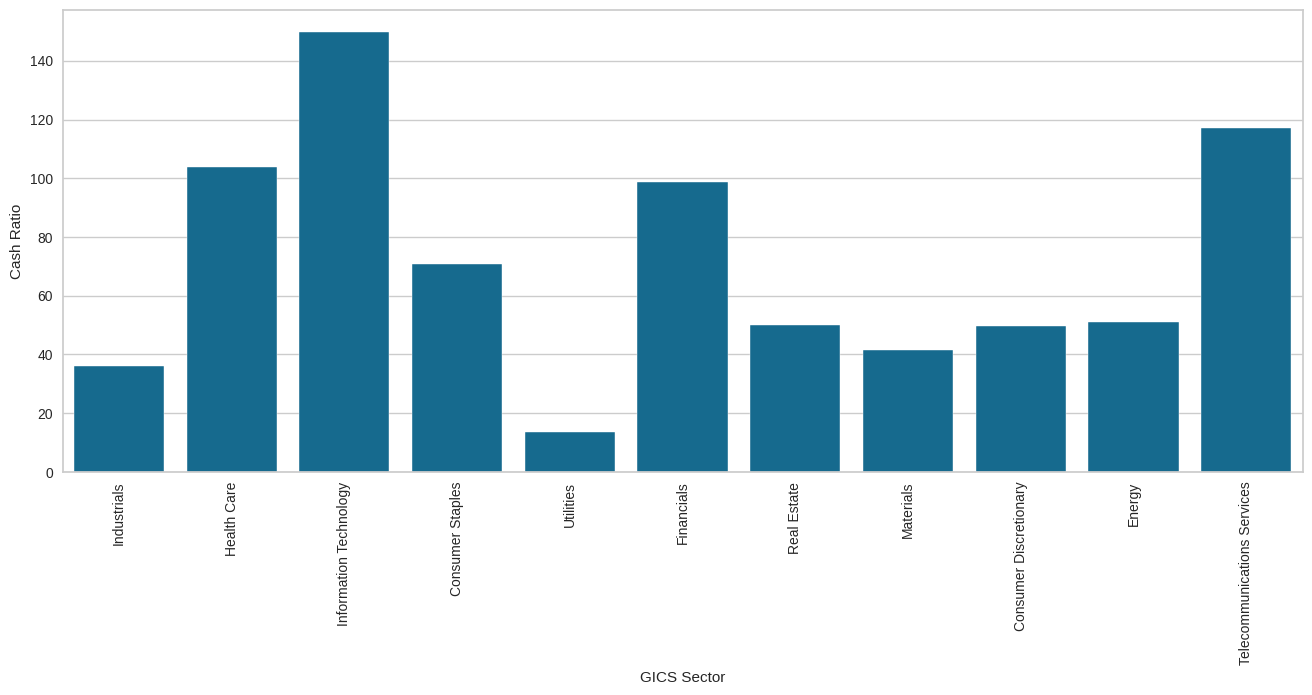

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='GICS Sector', y='Cash Ratio', data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

**Feedback:**

The bar chart illustrates the average cash ratio of companies within each GICS sector.

- It's evident that the Energy sector boasts the highest average cash ratio, followed by the Utilities and Materials sectors.

- On the other hand, the Communication Services and Information Technology sectors exhibit the lowest average cash ratios.

**How Stock Prices Will Be Affected:**

This distribution of average cash ratios across sectors can influence stock prices in several ways:

- **Financial Strength:** A higher cash ratio generally indicates a company's ability to meet short-term obligations and weather economic downturns. Investors often perceive companies with strong cash positions as less risky, potentially leading to higher stock prices for companies in sectors like Energy and Utilities.

- **Growth vs. Stability:** Sectors with lower cash ratios, such as Communication Services and Information Technology, might be investing heavily in growth initiatives, potentially at the expense of maintaining high cash reserves. While this can lead to future profitability, it might also increase perceived risk, potentially affecting stock prices.

- **Investor Preferences:** Risk-averse investors might favor companies in sectors with high cash ratios, seeking stability and dividend payouts. Growth-oriented investors might be drawn to sectors with lower cash ratios, anticipating higher returns from companies reinvesting their cash in expansion.

**Important Considerations:**

- The cash ratio is just one metric to assess a company's financial health. It's essential to consider other factors like profitability, debt levels, and industry dynamics.

- Market sentiment and macroeconomic conditions can also influence stock prices, regardless of sector-specific cash ratios.


``` P/E ratios across economic sector```

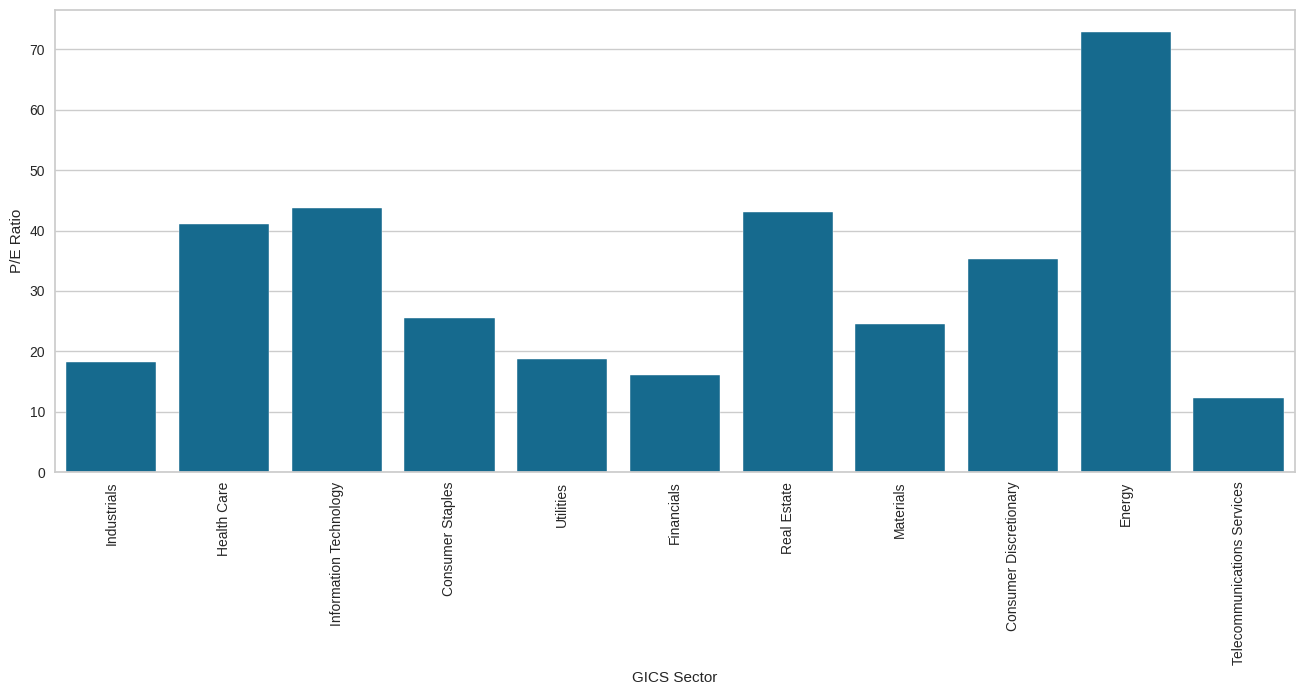

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='GICS Sector', y='P/E Ratio', data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

**Feedback:**

The bar chart displays the average P/E ratio of companies within each GICS sector.

- It's evident that the Consumer Discretionary sector boasts the highest average P/E ratio, followed by the Communication Services and Information Technology sectors.

- Conversely, the Financials, Utilities, and Real Estate sectors exhibit the lowest average P/E ratios.

**How Stock Prices Will Be Affected:**

This distribution of average P/E ratios across sectors can influence stock prices in several ways:

- **Growth Expectations:** A higher P/E ratio generally indicates that investors are willing to pay a premium for each dollar of earnings, anticipating future growth. This suggests that sectors like Consumer Discretionary, Communication Services, and Information Technology are perceived to have strong growth potential, potentially leading to higher stock prices.

- **Value Perception:** Sectors with lower P/E ratios, such as Financials, Utilities, and Real Estate, might be considered undervalued relative to their earnings. This could attract value investors seeking potential bargains, potentially boosting stock prices in those sectors.

- **Risk Assessment:** Higher P/E ratios can also imply higher risk, as investors are betting on future growth that may not materialize. Conversely, lower P/E ratios might suggest lower growth expectations but also potentially lower risk.

**Important Considerations:**

- The P/E ratio is just one valuation metric and should be considered alongside other factors like company fundamentals, industry trends, and macroeconomic conditions.

- Market sentiment and investor preferences can also significantly impact stock prices, regardless of sector-specific P/E ratios.


``` Volitity across economic sectors```

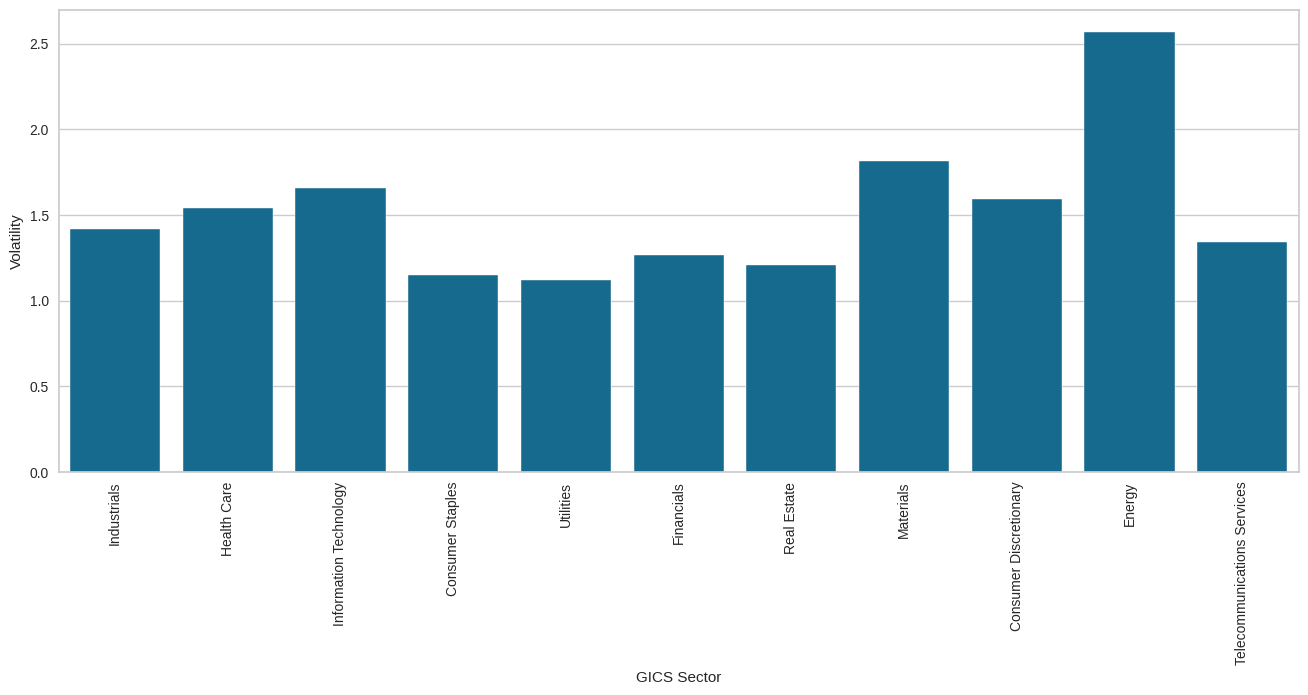

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='GICS Sector', y='Volatility', data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

**Feedback:**

The bar chart illustrates the average volatility of stocks within each GICS sector.

- It's evident that the Energy sector exhibits the highest average volatility, followed by the Materials and Information Technology sectors.

- Conversely, the Utilities and Consumer Staples sectors demonstrate the lowest average volatility.

**How Stock Prices Will Be Affected:**

This distribution of average volatility across sectors can influence stock prices in several ways:

- **Risk Perception:** Higher volatility generally indicates greater price fluctuations and potential for both large gains and losses. Investors seeking higher returns might be drawn to sectors like Energy and Materials, accepting the associated risk. Conversely, risk-averse investors might prefer sectors like Utilities and Consumer Staples, known for their relative stability.

- **Investor Sentiment:** Market sentiment can amplify volatility. Positive news in a high-volatility sector like Information Technology might lead to rapid price increases, while negative news could trigger sharp declines.

- **Economic Factors:** Sector-specific economic conditions can significantly impact volatility. For instance, fluctuating commodity prices might contribute to higher volatility in the Energy and Materials sectors, while regulatory changes could affect volatility in sectors like Financials.

**Important Considerations:**

- Volatility is just one aspect of risk assessment. It's crucial to consider other factors like company fundamentals, financial health, and industry trends.

- Market fluctuations and external factors can also influence stock prices, regardless of sector-specific volatility.


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Checking for Ouliers

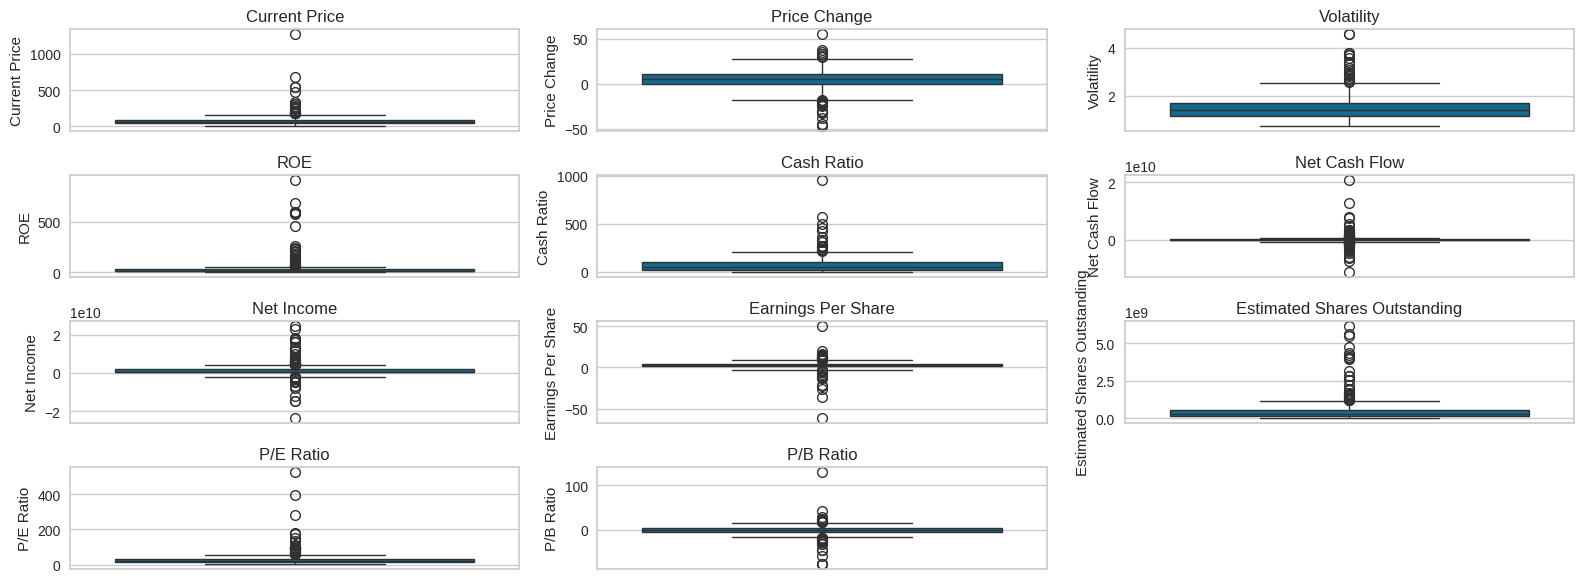

In [ ]:
plt.figure(figsize=(16, 6))

data_columns = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows needed for subplots
num_rows = (len(data_columns) + 2) // 3

for i, variable in enumerate(data_columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust rows
    sns.boxplot(df[variable])
    plt.title(variable)

plt.tight_layout()
plt.show()

### Scaling:


In [ ]:
#scaling data before conduct clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = df.select_dtypes(include=np.number)
scaled_data = scaler.fit_transform(subset)


In [ ]:
#create dataframe of scaled data
scaled_df = pd.DataFrame(scaled_data, columns=subset.columns)

## K-means Clustering

### Elbow Plot:


In [ ]:
k_means = scaled_df.copy()

Number of Clusters: 1 	Average Distance: 2.5425069919221697
Number of Clusters: 2 	Average Distance: 2.382318498894466
Number of Clusters: 3 	Average Distance: 2.2668604252073914
Number of Clusters: 4 	Average Distance: 2.175554082632614
Number of Clusters: 5 	Average Distance: 2.1225218310422096
Number of Clusters: 6 	Average Distance: 2.0801488338794774
Number of Clusters: 7 	Average Distance: 2.007912388016502
Number of Clusters: 8 	Average Distance: 1.9906420980784045
Number of Clusters: 9 	Average Distance: 1.9238161193330066
Number of Clusters: 10 	Average Distance: 1.8778525055691633


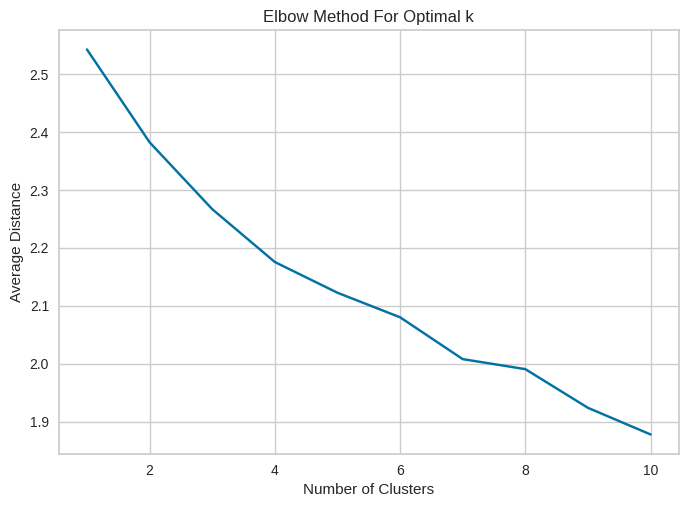

In [ ]:
cluster = range(1, 11)
wcss = []

for i in cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(k_means)
    prediction = kmeans.predict(k_means)
    distortion = (sum(np.min(cdist(k_means, kmeans.cluster_centers_, 'euclidean'), axis=1)) / k_means.shape[0])
    wcss.append(distortion)

    print('Number of Clusters:', i, '\tAverage Distance:', distortion)

plt.plot(cluster, wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method For Optimal k')
plt.show()



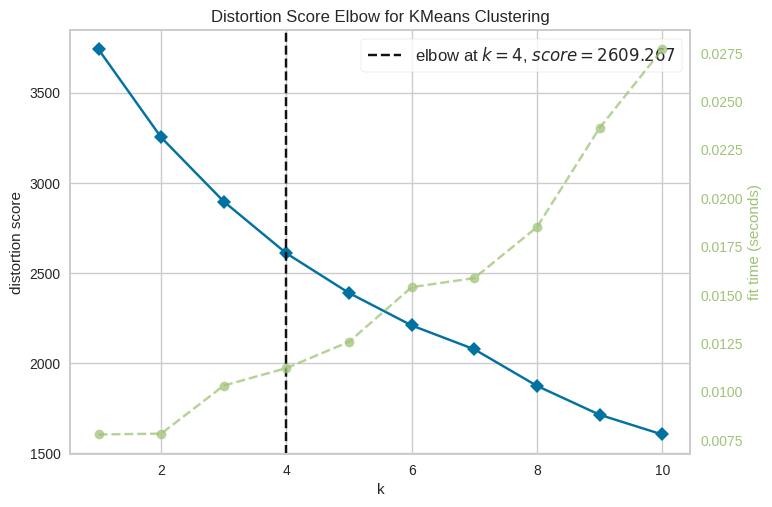

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model1 = KMeans(random_state=1)
visualizer1 = KElbowVisualizer(model1, k=(1,11))
visualizer1.fit(k_means)
visualizer1.show()


### Silhouette scores:


Number of Clusters: 2 	Silhouette Score: 0.43969639509980457
Number of Clusters: 3 	Silhouette Score: 0.4644405674779404
Number of Clusters: 4 	Silhouette Score: 0.45434371948348606
Number of Clusters: 5 	Silhouette Score: 0.43169988466492354
Number of Clusters: 6 	Silhouette Score: 0.36698524210914063
Number of Clusters: 7 	Silhouette Score: 0.10587349598463779
Number of Clusters: 8 	Silhouette Score: 0.40021596082234684
Number of Clusters: 9 	Silhouette Score: 0.4051539505522535
Number of Clusters: 10 	Silhouette Score: 0.1147132918355368


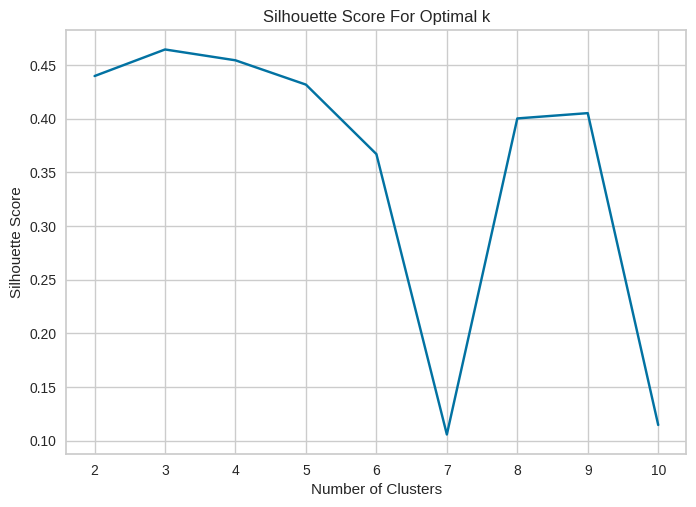

In [ ]:
silhouette_scores = []
cluster = range(2, 11)
for i in cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(k_means)
    prediction = kmeans.predict(k_means)
    score = silhouette_score(k_means, prediction)
    silhouette_scores.append(score)
    # kmeans  # This line seems unnecessary and is removed.
    print('Number of Clusters:', i, '\tSilhouette Score:', score)
    # print(kmeans)  # This line is also removed for clarity.

# Move the plotting outside the loop
plt.plot(cluster, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


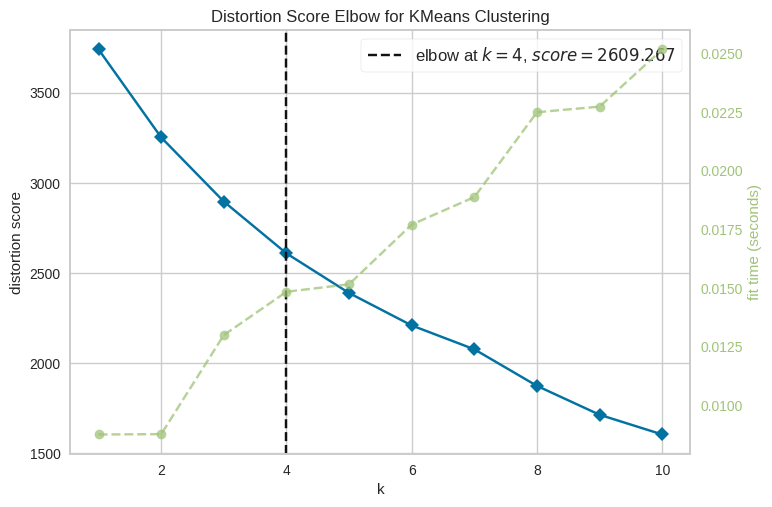

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(k_means)
visualizer.show()

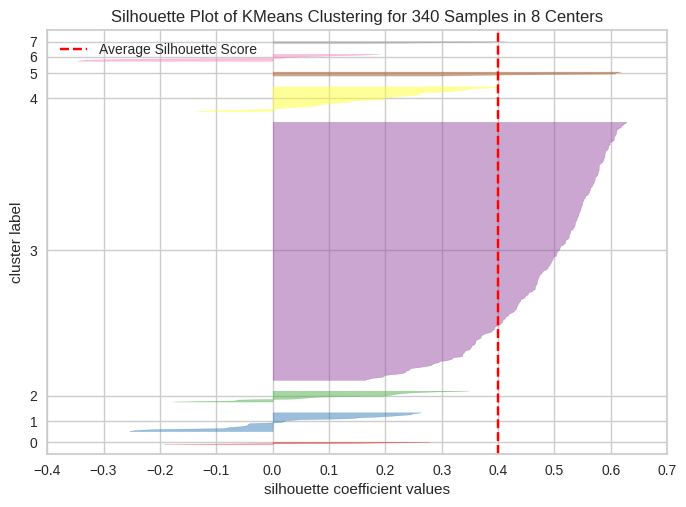

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#optimal number of clusters with silhouette coefficient
visualizer = SilhouetteVisualizer(KMeans(random_state=1))
visualizer.fit(k_means)
visualizer.show()

### Final Model:


In [ ]:
# Final K-Means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#copy of original data
df_copy = df.copy()

#adding K-means cluster labels
k_means["KM_segment"] = kmeans.labels_
df_copy['KM_Segments'] = kmeans.labels_


### Cluster Profiling


In [ ]:
# Calculate the mean of only numeric columns
kmeans_cluster_profile = df_copy.select_dtypes(include='number').groupby('KM_Segments').mean()
kmeans_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
KM_Segments,,,,,,,,,,,
0,243.226804,13.607350,1.742959,26.416667,285.083333,7.545485e+08,9.761372e+08,6.122917,5.672016e+08,77.542325,15.041637
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067
2,72.199223,5.078363,1.388428,34.517986,53.165468,6.069495e+07,1.534032e+09,3.623040,4.399962e+08,23.804667,-3.350239
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119


In [ ]:
kmeans_cluster_profile['count_of_each_segment'] = (df_copy.groupby('KM_Segments')["Security"].count().values)
kmeans_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_of_each_segment
KM_Segments,,,,,,,,,,,,
0,243.226804,13.607350,1.742959,26.416667,285.083333,7.545485e+08,9.761372e+08,6.122917,5.672016e+08,77.542325,15.041637,24
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
2,72.199223,5.078363,1.388428,34.517986,53.165468,6.069495e+07,1.534032e+09,3.623040,4.399962e+08,23.804667,-3.350239,278
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11


In [ ]:
#printing companies in each clusters
for cl in df_copy['KM_Segments'].unique():
  print("In cluster {}, the following companies are present:".format(cl) )
  print(df_copy[df_copy['KM_Segments'] == cl]['Security'].unique())
  print()


In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'C

In [ ]:
df_copy.groupby(['KM_Segments', 'GICS Sector'])['Security'].count()


KM_Segments  GICS Sector                
0            Consumer Discretionary          6
             Consumer Staples                1
             Energy                          1
             Health Care                     9
             Information Technology          5
             Real Estate                     1
             Telecommunications Services     1
1            Energy                         22
             Industrials                     1
             Information Technology          3
             Materials                       1
2            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     46
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
Name: Security, dtype: int64

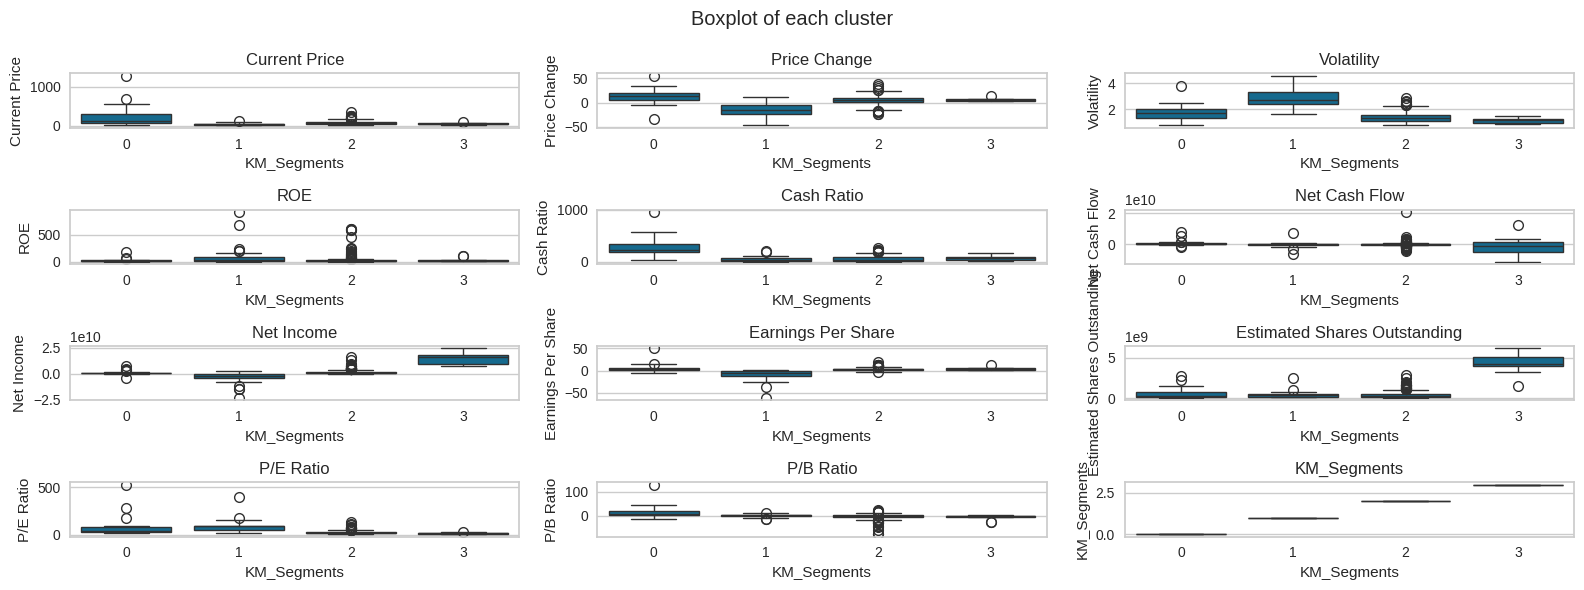

In [ ]:
#plotting
plt.figure(figsize=(16, 6))
plt.suptitle("Boxplot of each cluster")

#select numerical columns
num_column = df_copy.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows needed for subplots
num_rows = (len(num_column) + 2) // 3  # Round up to ensure enough rows

for i, variable in enumerate(num_column):
    plt.subplot(num_rows, 3, i + 1)  # Adjust the number of rows dynamically
    sns.boxplot(x='KM_Segments', y=variable, data=df_copy)
    plt.title(variable)

plt.tight_layout()
plt.show()

### Insights


Outlier Check:
- Several variables like 'Current Price', 'Estimated Shares Outstanding', 'Net Income', 'Total Assets',
'Long Term Debt', etc., show the presence of outliers. These outliers could be due to large variations in company sizes and financial performance. Consider handling these outliers (e.g. capping, transformation) before modeling to avoid skewed results.

Elbow Plot and Silhouette Score:
- Both methods suggest an optimal number of clusters around 4. This indicates that the data can be effectively segmented into four distinct groups.

K-Means Cluster Profiling:
- Cluster 0: Characterized by relatively lower values across most financial metrics, potentially representing smaller or less profitable companies.
- Cluster 1: Shows the highest average 'Current Price' and 'Net Income', suggesting a group of high-performing companies.
- Cluster 2: Exhibits high 'Total Assets' and 'Long Term Debt', possibly indicating larger, more established companies with significant debt burdens.
- Cluster 3: Stands out with the highest 'Cash Ratio', suggesting companies with strong liquidity and a conservative financial approach.

Boxplots:
- The boxplots visually confirm the cluster characteristics described above. They also highlight the variability within each cluster for different variables.

Further Analysis:
- Investigate the companies within each cluster to understand the common characteristics driving their grouping (e.g., industry, growth stage, financial strategies).
- Consider additional features or domain knowledge to refine the clustering and gain deeper insights.
- Explore the relationship between cluster membership and stock price performance to identify potential investment strategies.


## Hierarchical Clustering

### Cophenetic Correlation


In [ ]:
#making copy of scaled data
hc_df = scaled_df.copy()


In [ ]:
#list distance metric
distance_metrics = ['euclidean', 'cityblock', 'minkowski']

#list of linkage
linkage_methods = ['ward', 'complete', 'average', 'single']

high_cophenetic_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
  for lm in linkage_methods:
    if lm == 'ward' and dm != 'euclidean': # Check if ward is used with non-euclidean metric
      print("Skipping Ward linkage with {} distance".format(dm))
      continue # Skip to the next iteration
    Z = linkage(hc_df, metric=dm, method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} distance and {} linkage: {}".format(dm, lm, c))
    if c > high_cophenetic_corr:
      high_cophenetic_corr = c
      high_dm_lm = [dm, lm]

print("-"*100)
print("The highest cophenetic correlation is {} for {} distance and {} linkage".format(high_cophenetic_corr, high_dm_lm[0], high_dm_lm[1]))

Cophenetic correlation for euclidean distance and ward linkage: 0.7101180299865353
Cophenetic correlation for euclidean distance and complete linkage: 0.7873280186580672
Cophenetic correlation for euclidean distance and average linkage: 0.9422540609560814
Cophenetic correlation for euclidean distance and single linkage: 0.9232271494002922
Skipping Ward linkage with cityblock distance
Cophenetic correlation for cityblock distance and complete linkage: 0.7375328863205818
Cophenetic correlation for cityblock distance and average linkage: 0.9302145048594667
Cophenetic correlation for cityblock distance and single linkage: 0.9334186366528574
Skipping Ward linkage with minkowski distance
Cophenetic correlation for minkowski distance and complete linkage: 0.7873280186580672
Cophenetic correlation for minkowski distance and average linkage: 0.9422540609560814
Cophenetic correlation for minkowski distance and single linkage: 0.9232271494002922
---------------------------------------------------

``` Alternate linkage method with Euclidean```


In [ ]:
#list of linkage method with only Euclidean method
linkage_methods = ['ward', 'complete', 'average', 'single']

high_cophenetic_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
  Z = linkage(hc_df, metric='euclidean', method=lm)
  c, coph_dists = cophenet(Z, pdist(hc_df))
  print("Cophenetic correlation for {} distance and {} linkage: {}".format('euclidean', lm, c))
  if c > high_cophenetic_corr:
    high_cophenetic_corr = c
    high_dm_lm = ['euclidean', lm]

print("-"*100)
print("The highest cophenetic correlation is {} for {} distance and {} linkage".format(high_cophenetic_corr, high_dm_lm[0], high_dm_lm[1]))


Cophenetic correlation for euclidean distance and ward linkage: 0.7101180299865353
Cophenetic correlation for euclidean distance and complete linkage: 0.7873280186580672
Cophenetic correlation for euclidean distance and average linkage: 0.9422540609560814
Cophenetic correlation for euclidean distance and single linkage: 0.9232271494002922
----------------------------------------------------------------------------------------------------
The highest cophenetic correlation is 0.9422540609560814 for euclidean distance and average linkage


### Dendogram

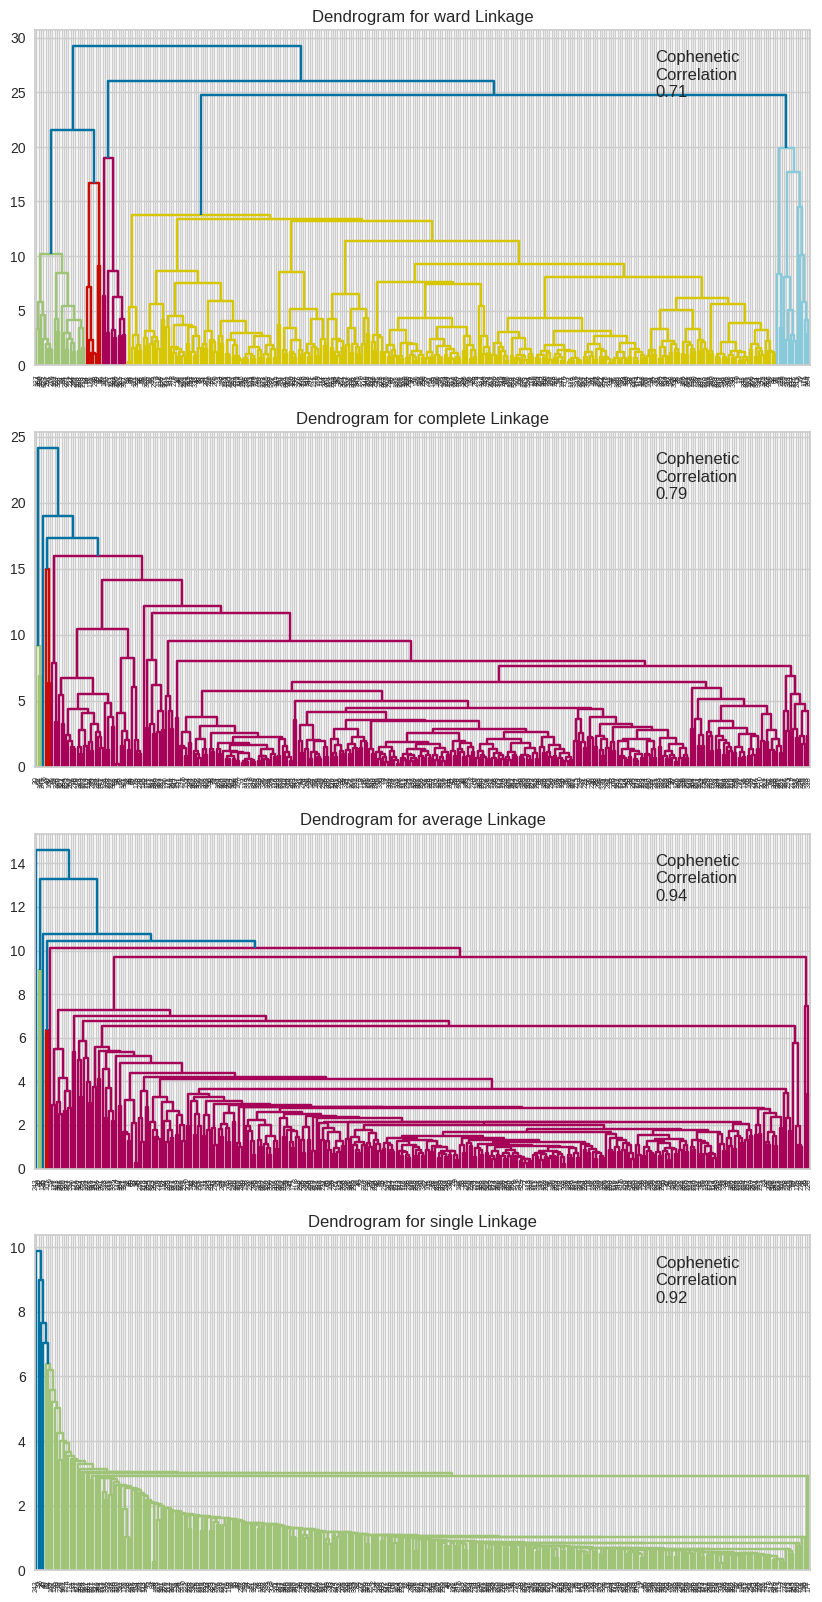

In [ ]:
# list of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# list to save result
compare_columns = ['Linkage', 'Cophenetic Correlation']
compare = []

#subplot image
fig, ax = plt.subplots(len(linkage_methods), 1, figsize=(10, 5*len(linkage_methods)))

for i, lm in enumerate(linkage_methods):
  Z = linkage(hc_df, metric='euclidean', method=lm) # Use 'lm' instead of 'method'
  dendrogram(Z, ax=ax[i])
  ax[i].set_title(f'Dendrogram for {lm} Linkage')
  coph_corr, coph_dists = cophenet(Z, pdist(hc_df))
  # Assuming 'axis' should be 'ax'
  ax[i].annotate(f'Cophenetic\nCorrelation\n{round(coph_corr, 2)}', (0.80, 0.80), xycoords='axes fraction')
  compare.append([lm, coph_corr])

In [ ]:
#create and print dataframe to compare
compare_df = pd.DataFrame(compare, columns=compare_columns)
compare_df = compare_df.sort_values(by='Cophenetic Correlation', ascending=False)
compare_df

,Linkage,Cophenetic Correlation
2,average,0.942254
3,single,0.923227
1,complete,0.787328
0,ward,0.710118


### Create model using SKlearn

In [ ]:
HC_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
HC_model.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
#creating a copy of the OG dataset
df2 = df.copy()

#adding cluster labels
hc_df['HC_segment'] = HC_model.labels_
df2['HC_Segments'] = HC_model.labels_

### Cluster Profiling


In [ ]:
hc_cluster_profile = df2.select_dtypes(include='number').groupby('HC_Segments').mean()
hc_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Segments,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-4.959017e+08,-3.597245e+09,-8.689655,4.863198e+08,75.110924,-2.162622
1,326.198218,10.563242,1.642560,14.400000,309.466667,2.888507e+08,8.644985e+08,7.785333,5.449003e+08,113.095334,19.142151
2,42.848182,6.270446,1.123547,22.727273,71.454545,5.586364e+08,1.463127e+10,3.410000,4.242573e+09,15.242169,-4.924615
3,72.760400,5.213307,1.427078,25.603509,60.392982,7.995151e+07,1.538594e+09,3.655351,4.464721e+08,24.722670,-2.647194


In [ ]:
hc_cluster_profile['count_of_each_segment'] = (df2.groupby('HC_Segments')["Security"].count().values)
hc_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_of_each_segment
HC_Segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-4.959017e+08,-3.597245e+09,-8.689655,4.863198e+08,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,2.888507e+08,8.644985e+08,7.785333,5.449003e+08,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,5.586364e+08,1.463127e+10,3.410000,4.242573e+09,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,7.995151e+07,1.538594e+09,3.655351,4.464721e+08,24.722670,-2.647194,285


In [ ]:
hc_cluster_profile.style.highlight_max(axis=0, color='green')


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_of_each_segment
HC_Segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


In [ ]:
for cl in df2['HC_Segments'].unique():
  print("In cluster {}, the following companies are present:".format(cl) )
  print(df2[df2['HC_Segments'] == cl]['Security'].unique())
  print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [ ]:
df2.groupby(['HC_Segments', 'GICS Sector'])['Security'].count()

HC_Segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
Name: Security, dtype: int64

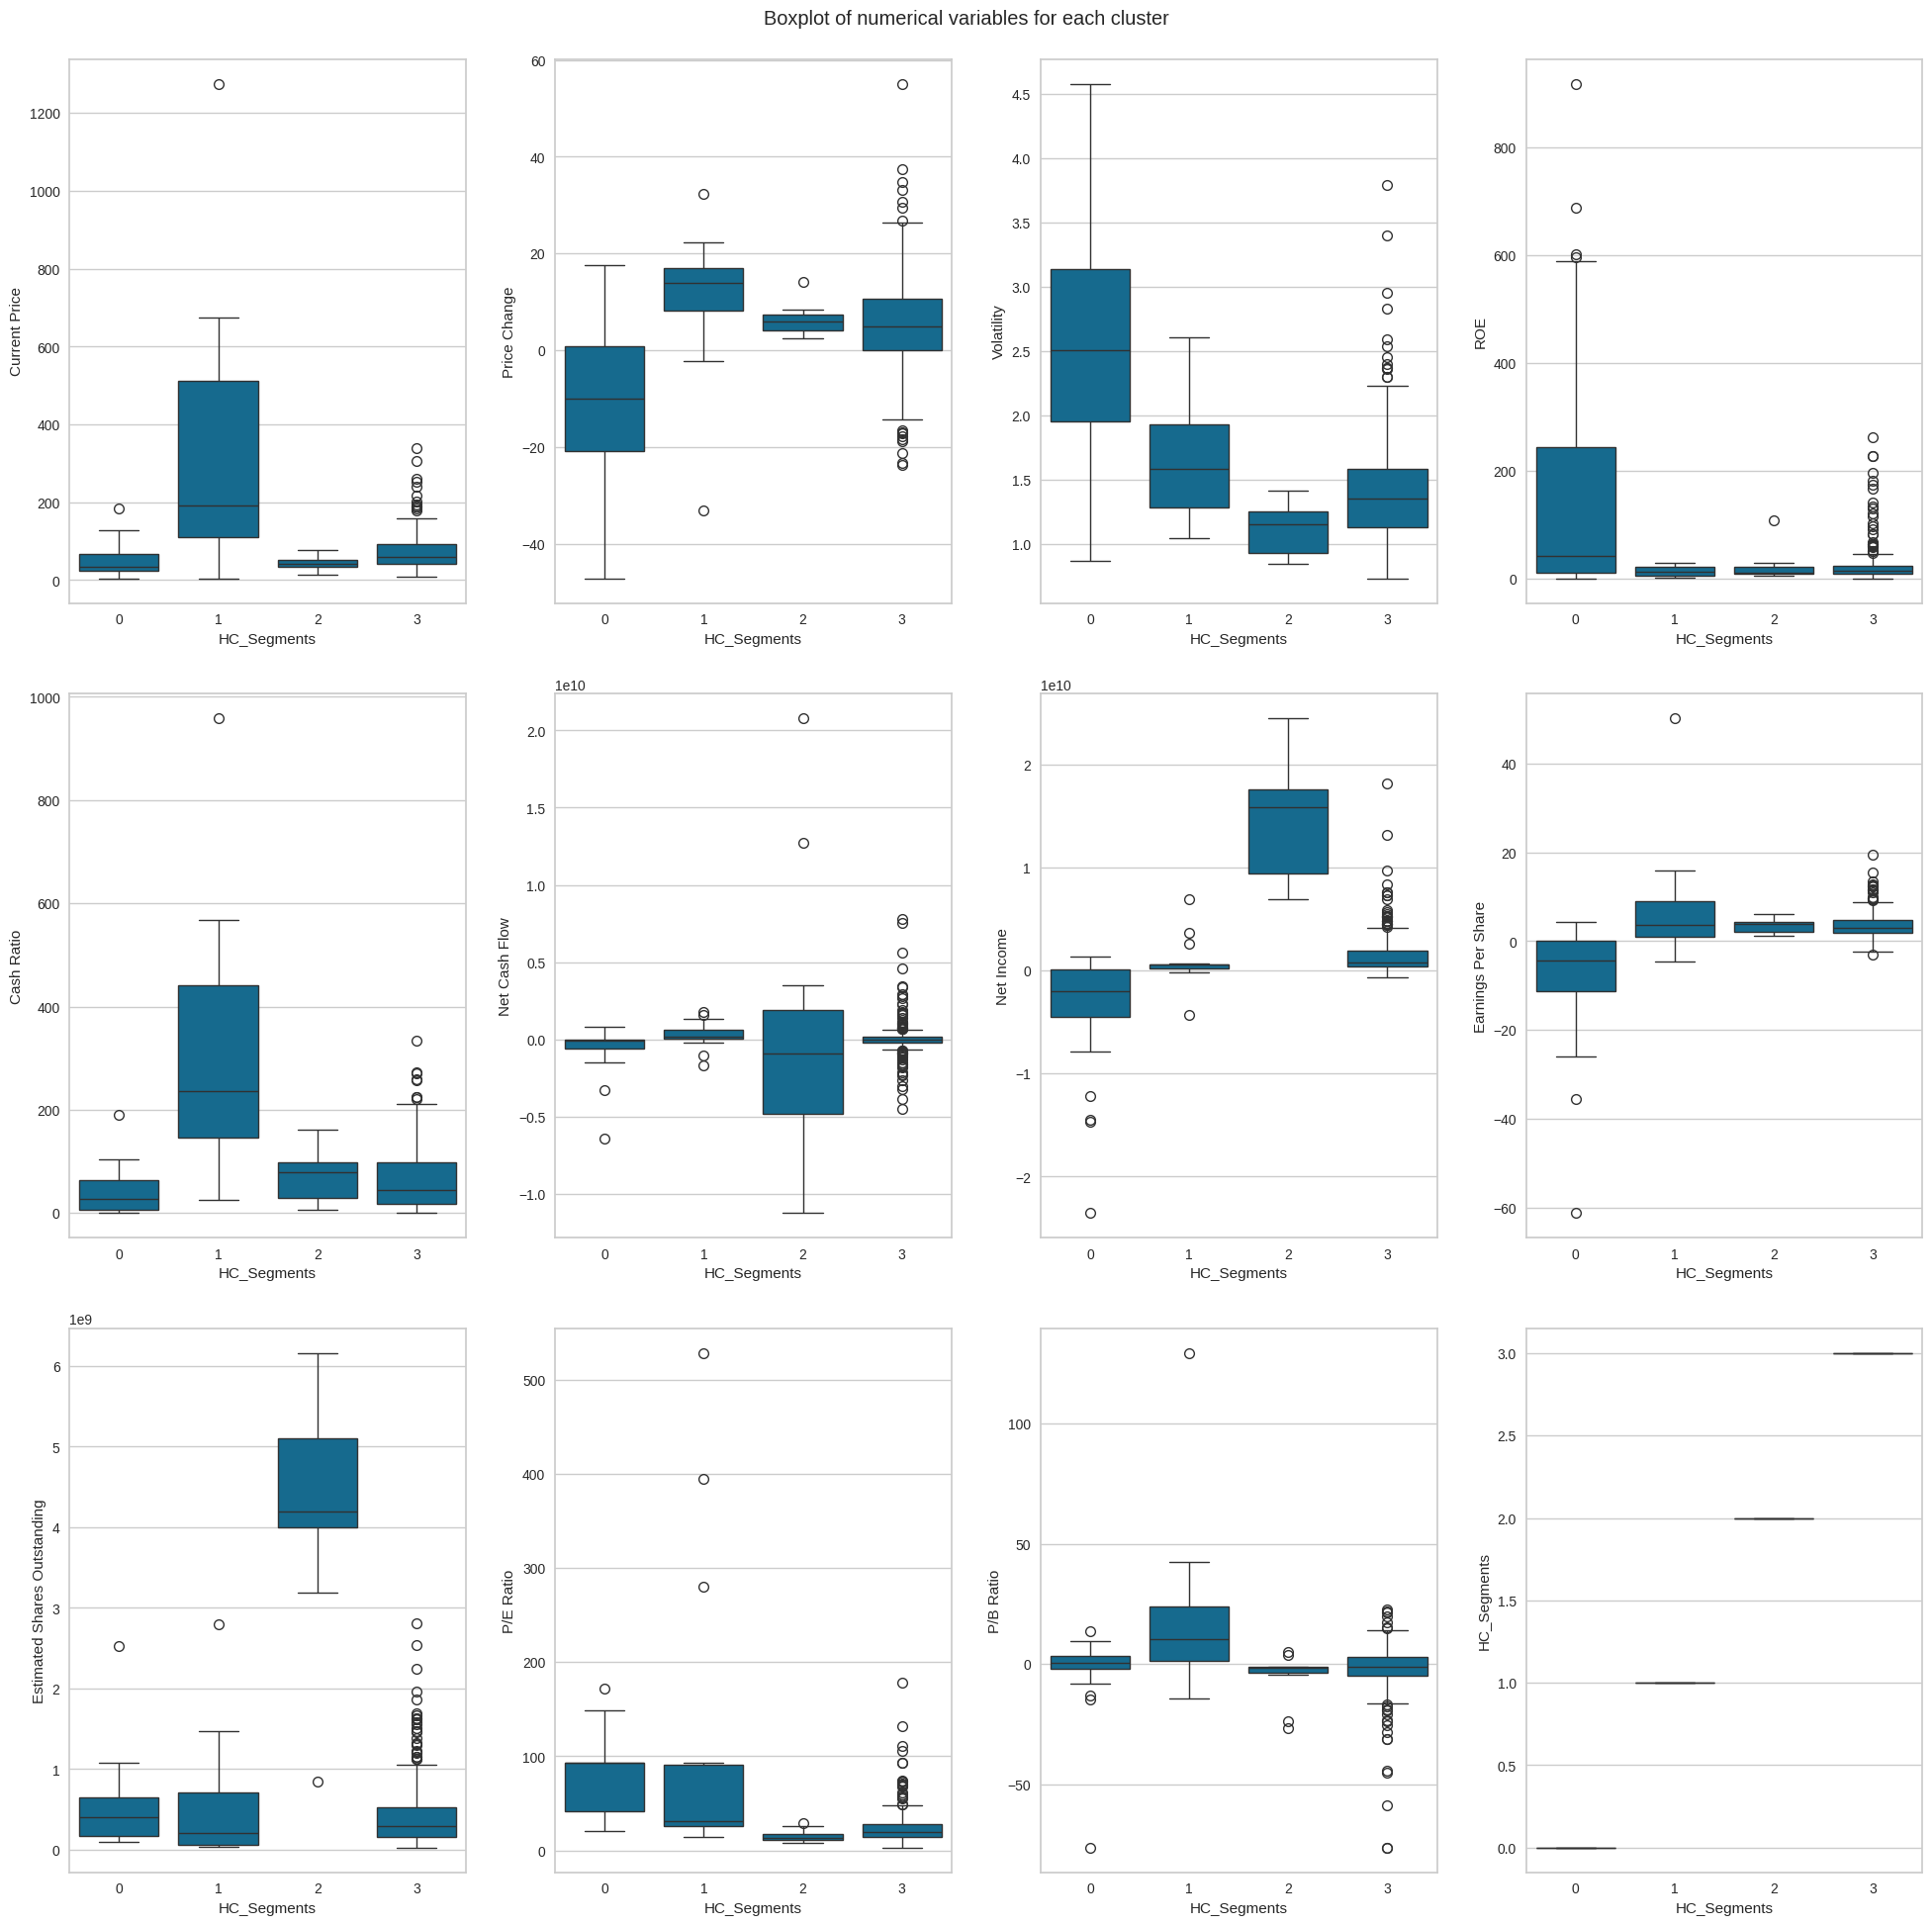

In [ ]:
num_col = df2.select_dtypes(include=['float', 'int']).columns  # Get numerical columns

plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    # Correct the column name to 'HC_Segments'
    sns.boxplot(data=df2, x="HC_Segments", y=variable)

plt.tight_layout(pad=2.0)
plt.show() # Display the plot


## K-means vs Hierarchical Clustering

## Comparision
K-Means execution time: 0.0164 seconds

Hierarchical Clustering execution time: 0.0042 seconds

Hence, Hierarchical Clustering took less time for execution.

`---------------------------------------------------------`

Overall standard deviation of cluster characteristics for K-Means: 1.0385

Overall standard deviation of cluster characteristics for Hierarchical Clustering: 1.1117

Hierarchical clustering resulted in more distinct clusters.


`-------------------------------------------------------`

Total number of observations in similar clusters: 318

`-------------------------------------------------------`

Number of clusters obtained from K-Means: 4

Number of clusters obtained from Hierarchical Clustering: 4


## Comparision: (code breakdown)


In [ ]:
# Which clustering technique took less time for execution?

import time

# Record start time for K-Means
start_time_kmeans = time.time()

# K-Means clustering code (from previous sections)
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means)
# ... (rest of the K-Means code)

# Record end time for K-Means
end_time_kmeans = time.time()

# Record start time for Hierarchical Clustering
start_time_hc = time.time()

# Hierarchical clustering code (from previous sections)
HC_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
HC_model.fit(hc_df)
# ... (rest of the Hierarchical Clustering code)

# Record end time for Hierarchical Clustering
end_time_hc = time.time()

# Calculate execution times
execution_time_kmeans = end_time_kmeans - start_time_kmeans
execution_time_hc = end_time_hc - start_time_hc

print("K-Means execution time:", round(execution_time_kmeans,4), "seconds")
print("Hierarchical Clustering execution time:", round (execution_time_hc,4), "seconds")
print("-"*100)

# Determine which technique was faster
if execution_time_kmeans < execution_time_hc:
    print("K-Means took less time for execution.")
else:
    print("Hierarchical Clustering took less time for execution.")


K-Means execution time: 0.0164 seconds
Hierarchical Clustering execution time: 0.0042 seconds
----------------------------------------------------------------------------------------------------
Hierarchical Clustering took less time for execution.


In [ ]:
# Calculate the standard deviation of cluster characteristics for each technique
kmeans_std = k_means.groupby('KM_segment').std()
hc_std = hc_df.groupby('HC_segment').std()

# Compare the overall standard deviations
kmeans_overall_std = kmeans_std.mean().mean()
hc_overall_std = hc_std.mean().mean()

print("Overall standard deviation of cluster characteristics for K-Means:", round (kmeans_overall_std,4))
print("Overall standard deviation of cluster characteristics for Hierarchical Clustering:", round (hc_overall_std,4))

print ('-'*100)

if kmeans_overall_std > hc_overall_std:
    print("K-Means clustering resulted in more distinct clusters.")
elif hc_overall_std > kmeans_overall_std:
    print("Hierarchical clustering resulted in more distinct clusters.")
else:
    print("Both clustering techniques produced similarly distinct clusters.")


Overall standard deviation of cluster characteristics for K-Means: 1.0385
Overall standard deviation of cluster characteristics for Hierarchical Clustering: 1.1117
----------------------------------------------------------------------------------------------------
Hierarchical clustering resulted in more distinct clusters.


In [ ]:
# Create a cross-tabulation to count observations in each cluster combination
cluster_comparison = pd.crosstab(df_copy['KM_Segments'], df2['HC_Segments'])

# Print the cross-tabulation
print(cluster_comparison)

# Calculate the total number of observations in similar clusters
similar_observations = cluster_comparison.max(axis=1).sum()

print("-"*100)
print("Total number of observations in similar clusters:", similar_observations)


HC_Segments   0   1   2    3
KM_Segments                 
0             0  14   0   10
1            23   1   0    3
2             6   0   1  271
3             0   0  10    1
----------------------------------------------------------------------------------------------------
Total number of observations in similar clusters: 318


In [ ]:
# Number of clusters from K-Means
num_clusters_kmeans = kmeans.n_clusters
print("Number of clusters obtained from K-Means:", num_clusters_kmeans)

# Number of clusters from Hierarchical Clustering
num_clusters_hc = HC_model.n_clusters
print("Number of clusters obtained from Hierarchical Clustering:", num_clusters_hc)


Number of clusters obtained from K-Means: 4
Number of clusters obtained from Hierarchical Clustering: 4


## Actionable Insights and Recommendations


### **Actionable Insights:**


**Investment Strategies:**

- **High-Growth Portfolio:** Focus on companies in Cluster 1 (K-Means) or a similar cluster from Hierarchical Clustering. These companies exhibit high current prices and net income, indicating strong growth potential. Consider allocating a larger portion of your portfolio to these stocks if you have a higher risk tolerance.
- **Value Investing:** Explore companies in Cluster 0 (K-Means) or its equivalent from Hierarchical Clustering. These companies might be undervalued due to their lower financial metrics. Conduct further fundamental analysis to identify potential hidden gems with good long-term growth prospects.
- **Income-Focused Portfolio:**  Investigate companies in Cluster 3 (K-Means) or a comparable cluster from Hierarchical Clustering. Their high cash ratios suggest strong liquidity and potential for dividend payouts, making them suitable for income-seeking investors.
- **Diversification:**  Don't put all your eggs in one basket. Diversify your
portfolio across different clusters to balance risk and potential returns. Consider the correlation between clusters and overall market conditions.

**Risk Management:**

- **Outlier Handling:** Address the outliers identified in variables like 'Current Price' and 'Net Income'. These outliers can skew the clustering results and potentially lead to misinterpretations. Consider techniques like capping or transformation to mitigate their impact.
- **Sector Analysis:**  Delve deeper into the sector distribution within each cluster. Understand how sector-specific factors (e.g., regulatory changes, commodity prices) might influence the performance of companies within those clusters.
- **Continuous Monitoring:**  The financial landscape is dynamic. Regularly update your analysis and clustering models to reflect changes in market conditions and company performance.


**Further Research:**

- **Fundamental Analysis:**  Conduct in-depth fundamental analysis on companies within each cluster to validate the clustering results and identify specific investment opportunities.
- **Factor Investing:** Explore incorporating additional factors (e.g., growth, value, quality) into your analysis to refine the clustering and identify stocks with specific characteristics.
- **Backtesting:**  Consider backtesting investment strategies based on the clustering results to assess their historical performance and potential for future success.

### **Recommendations:**

Based on the clustering analysis, the following recommendations are:

1. **Portfolio Diversification:** Diversify investments across different clusters to balance risk and returns. This strategy mitigates the impact of sector-specific or cluster-specific risks.

2. **Targeted Investment Strategies:**
     - **High-Growth:** Focus on Cluster 1 (K-Means) or similar clusters for high-growth potential.
     - **Value Investing:** Consider Cluster 0 (K-Means) for potentially undervalued companies.
     - **Income-Focused:** Explore Cluster 3 (K-Means) for companies with strong liquidity and potential dividends.

3. **Risk Management:**
     - **Outlier Handling:** Address outliers in variables like 'Current Price' and 'Net Income' to avoid skewed results.
     - **Sector Analysis:** Analyze sector distribution within clusters to understand sector-specific influences.
     - **Continuous Monitoring:** Regularly update the analysis to reflect market changes and company performance.

4. **Further Research:**
    - **Fundamental Analysis:** Conduct in-depth analysis on companies within clusters to validate findings.
    - **Factor Investing:** Incorporate additional factors like growth, value, and quality to refine clustering.
    - **Backtesting:** Assess historical performance of investment strategies based on clustering results.